<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Porter_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porter Neural Networks

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

Import Packages

In [1]:
# Import required packages
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from datetime import datetime
warnings.filterwarnings('ignore')


Import & Load data

In [2]:
df=pd.read_csv("/content/dataset.csv")

Statistical Summary


Meta-data of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

Description of the dataframe


In [4]:
df.describe().T

count         mean          std   min     25%  \
market_id                 196441.0     2.978706     1.524867   1.0     2.0   
order_protocol            196433.0     2.882352     1.503771   1.0     1.0   
total_items               197428.0     3.196391     2.666546   1.0     2.0   
subtotal                  197428.0  2682.331402  1823.093688   0.0  1400.0   
num_distinct_items        197428.0     2.670791     1.630255   1.0     1.0   
min_item_price            197428.0   686.218470   522.038648 -86.0   299.0   
max_item_price            197428.0  1159.588630   558.411377   0.0   800.0   
total_onshift_partners    181166.0    44.808093    34.526783  -4.0    17.0   
total_busy_partners       181166.0    41.739747    32.145733  -5.0    15.0   
total_outstanding_orders  181166.0    58.050065    52.661830  -6.0    17.0   

                             50%     75%      max  
market_id                    3.0     4.0      6.0  
order_protocol               3.0     4.0      7.0  
total_items                  3.0     4.0    411.0  
subtotal                  2200.0  3395.0  27100.0  
num_distinct_items           2.0     3.0     20.0  
min_item_price             595.0   949.0  14700.0  
max_item_price            1095.0  1395.0  14700.0  
total_onshift_partners      37.0    65.0    171.0  
total_busy_partners         34.0    62.0    154.0  
total_outstanding_orders    41.0    85.0    285.0

In [5]:
df.describe(include='all').T


count  unique                               top  \
market_id                 196441.0     NaN                               NaN   
created_at                  197428  180985               2015-02-11 19:50:43   
actual_delivery_time        197421  178110               2015-02-11 20:40:45   
store_id                    197428    6743  d43ab110ab2489d6b9b2caa394bf920f   
store_primary_category      192668      74                          american   
order_protocol            196433.0     NaN                               NaN   
total_items               197428.0     NaN                               NaN   
subtotal                  197428.0     NaN                               NaN   
num_distinct_items        197428.0     NaN                               NaN   
min_item_price            197428.0     NaN                               NaN   
max_item_price            197428.0     NaN                               NaN   
total_onshift_partners    181166.0     NaN                               NaN   
total_busy_partners       181166.0     NaN                               NaN   
total_outstanding_orders  181166.0     NaN                               NaN   

                           freq         mean          std   min     25%  \
market_id                   NaN     2.978706     1.524867   1.0     2.0   
created_at                    6          NaN          NaN   NaN     NaN   
actual_delivery_time          5          NaN          NaN   NaN     NaN   
store_id                    937          NaN          NaN   NaN     NaN   
store_primary_category    19399          NaN          NaN   NaN     NaN   
order_protocol              NaN     2.882352     1.503771   1.0     1.0   
total_items                 NaN     3.196391     2.666546   1.0     2.0   
subtotal                    NaN  2682.331402  1823.093688   0.0  1400.0   
num_distinct_items          NaN     2.670791     1.630255   1.0     1.0   
min_item_price              NaN    686.21847   522.038648 -86.0   299.0   
max_item_price              NaN   1159.58863   558.411377   0.0   800.0   
total_onshift_partners      NaN    44.808093    34.526783  -4.0    17.0   
total_busy_partners         NaN    41.739747    32.145733  -5.0    15.0   
total_outstanding_orders    NaN    58.050065     52.66183  -6.0    17.0   

                             50%     75%      max  
market_id                    3.0     4.0      6.0  
created_at                   NaN     NaN      NaN  
actual_delivery_time         NaN     NaN      NaN  
store_id                     NaN     NaN      NaN  
store_primary_category       NaN     NaN      NaN  
order_protocol               3.0     4.0      7.0  
total_items                  3.0     4.0    411.0  
subtotal                  2200.0  3395.0  27100.0  
num_distinct_items           2.0     3.0     20.0  
min_item_price             595.0   949.0  14700.0  
max_item_price            1095.0  1395.0  14700.0  
total_onshift_partners      37.0    65.0    171.0  
total_busy_partners         34.0    62.0    154.0  
total_outstanding_orders    41.0    85.0    285.0

In [6]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

Shape of the data


In [7]:
### Data shape
print("Porter dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Porter dataset has 197428 rows and 14 columns.


Size & Count

In [8]:
# total number of elements/records 
df.size

2763992

Column Names

In [10]:
# Columna names
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

Column data typess

In [11]:
### Data type of all attributes
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

 Each column corresponds to a feature as explained below.

1.market_id : integer id for the market where the restaurant lies

2.created_at : the timestamp at which the order was placed

3.actual_delivery_time : the timestamp when the order was delivered

4.store_primary_category : category for the restaurant

5.order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

6.total_items subtotal : final price of the order

7.num_distinct_items : the number of distinct items in the order

8.min_item_price : price of the cheapest item in the order

9.max_item_price : price of the costliest item in order

10.total_onshift_partners : number of delivery partners on duty at the time order was placed

11.total_busy_partners : number of delivery partners attending to other tasks

12.total_outstanding_orders : total number of orders to be fulfilled at the moment




In [12]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

##Data preprocessing & Cleaning


###Handling Missing Values 

<Axes: >

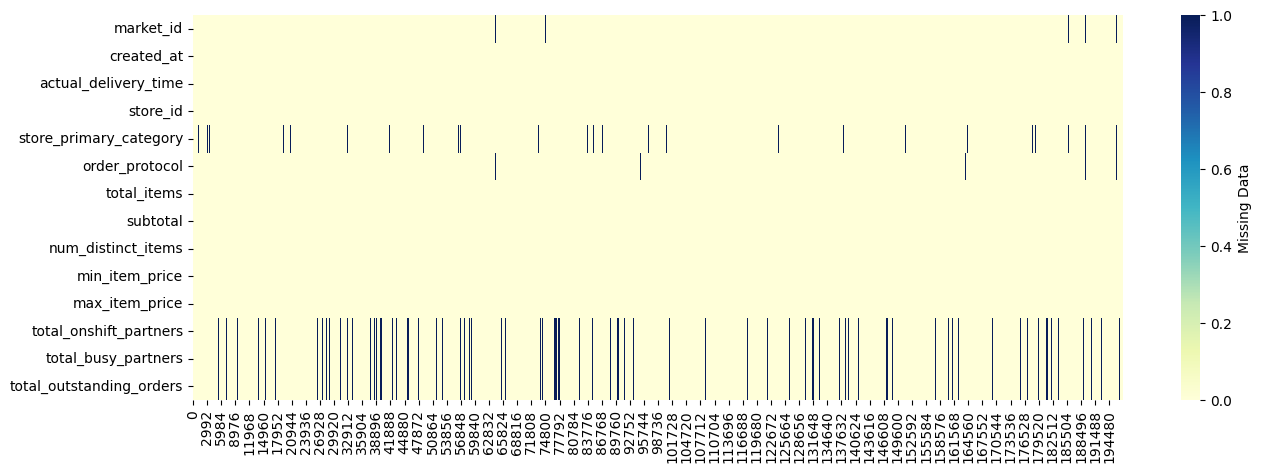

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [14]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

Null Values  Percentage Null Value
market_id                         987               0.499929
created_at                          0               0.000000
actual_delivery_time                7               0.003546
store_id                            0               0.000000
store_primary_category           4760               2.411006
order_protocol                    995               0.503981
total_items                         0               0.000000
subtotal                            0               0.000000
num_distinct_items                  0               0.000000
min_item_price                      0               0.000000
max_item_price                      0               0.000000
total_onshift_partners          16262               8.236927
total_busy_partners             16262               8.236927
total_outstanding_orders        16262               8.236927

In [15]:
df.market_id.unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [16]:
df.market_id.value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

In [17]:

mode_value = df['market_id'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['market_id'].fillna(mode_value, inplace=True)

2.0


In [18]:
df.order_protocol.unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [19]:
df.order_protocol.value_counts()

1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [20]:

mode_value = df['order_protocol'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['order_protocol'].fillna(mode_value, inplace=True)

1.0


In [21]:
df.total_onshift_partners.unique()

array([ 33.,   1.,   6.,   2.,  10.,   7.,   8.,   3.,  16.,   5.,   4.,
        24.,  12.,  19.,  21.,  22.,  27.,  13.,  18., 117., 130., 121.,
        94.,  34.,  17.,  38.,  20.,  15.,  39.,  26.,  30.,  35.,  11.,
        14.,  32.,  29.,  25.,  23.,  61.,  41.,  58.,  51.,  57.,  60.,
         9., 108.,  72.,  89., 112.,  55., 126.,  80.,  69., 125., 113.,
       105.,  98.,  86.,  90.,  87.,  74.,  84.,  91.,  96., 123., 101.,
       119.,  nan, 129.,  66.,  81.,  36.,  75.,  43.,  70.,  65.,  77.,
       114.,  62., 116., 102.,  76.,  67.,  64.,  88.,  73.,  63.,  46.,
        28.,  47., 110.,  97.,  42.,  79.,  49.,  50.,  37.,  92., 103.,
        44.,  68.,  56.,   0., 107.,  78.,  71., 128., 104.,  45.,  31.,
       100.,  40.,  53., 115., 109.,  99.,  85.,  59., 118.,  54.,  52.,
        48., 132., 127., 133., 131., 149.,  93., 111.,  95.,  82., 136.,
       120., 134., 124., 106., 137.,  83., 152., 147., 144., 150., 145.,
       122., 155., 135., 151., 140., 141., 143., 13

In [22]:
df.total_onshift_partners.value_counts()

 0.0      3615
 18.0     2924
 15.0     2912
 21.0     2841
 19.0     2824
          ... 
 164.0       1
 159.0       1
 169.0       1
-4.0         1
 168.0       1
Name: total_onshift_partners, Length: 172, dtype: int64

In [23]:
median_value = df['total_onshift_partners'].median()

df['total_onshift_partners'].fillna(median_value, inplace=True)

In [24]:
median_value = df['total_busy_partners'].median()

df['total_busy_partners'].fillna(median_value, inplace=True)

In [25]:
median_value = df['total_outstanding_orders'].median()

df['total_outstanding_orders'].fillna(median_value, inplace=True)

In [26]:

df['actual_delivery_time'] = df['actual_delivery_time'].fillna(method='ffill')

In [27]:
df.store_primary_category.unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [28]:
df.store_primary_category.value_counts()

american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [29]:
df['store_primary_category'] = df['store_primary_category'].fillna("Not Specified")

In [30]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

Null Values  Percentage Null Value
market_id                           0                    0.0
created_at                          0                    0.0
actual_delivery_time                0                    0.0
store_id                            0                    0.0
store_primary_category              0                    0.0
order_protocol                      0                    0.0
total_items                         0                    0.0
subtotal                            0                    0.0
num_distinct_items                  0                    0.0
min_item_price                      0                    0.0
max_item_price                      0                    0.0
total_onshift_partners              0                    0.0
total_busy_partners                 0                    0.0
total_outstanding_orders            0                    0.0

In [31]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25          Not Specified             1.0   
3  f0ade77b43923b38237db569b016ba25          Not Specified             1.0   
4  f0ade77b43923b38237db569b016ba25          Not Specified             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

## Data Pre-Proceesing & Feature Engineering



In [32]:
df["created_at"] = pd.to_datetime(df["created_at"])
df['created_date'] = df['created_at'].dt.date

df['created_year'] = df['created_at'].dt.year
df['created_month'] = df['created_at'].dt.month
df['created_hour'] = df['created_at'].dt.hour

In [33]:
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df['actual_delivery_date'] = df['actual_delivery_time'].dt.date
df['actual_deli_hour'] = df['actual_delivery_time'].dt.hour
df['actual_deli_year'] = df['actual_delivery_time'].dt.year
df['actual_deli_month'] = df['actual_delivery_time'].dt.month

In [34]:
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [35]:

df['created_day_of_week'] = df['created_at'].dt.day_name()

In [36]:
df['actual_delivery_day_of_week'] = df['actual_delivery_time'].dt.day_name()

In [37]:
# Convert the datatype of few columns to category type
df['market_id'] = df['market_id'].astype('object')
df['store_id'] = df['store_id'].astype('object')
df['store_primary_category'] = df['store_primary_category'].astype('object')
df['order_protocol'] = df['order_protocol'].astype('object')

In [38]:
# Convert the datatype of few columns to category type
df['total_items'] = df['total_items'].astype('int64')
df['subtotal'] = df['subtotal'].astype('int64')
df['num_distinct_items'] = df['num_distinct_items'].astype('int64')
df['min_item_price'] = df['min_item_price'].astype('int64')
df['max_item_price'] = df['max_item_price'].astype('int64')

In [39]:
df = df.drop(['store_id'], axis=1)

In [40]:
num_columns = df.select_dtypes('number')
for col in num_columns:
  print(col)

total_items
subtotal
num_distinct_items
min_item_price
max_item_price
total_onshift_partners
total_busy_partners
total_outstanding_orders
created_year
created_month
created_hour
actual_deli_hour
actual_deli_year
actual_deli_month
delivery_time


In [41]:
cols=num_columns.columns


## Outlier Treatment

In [42]:
def percentage_outliers(df, column_name):
    data = df[column_name]
    
    # calculate the upper and lower bounds for outliers
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # identify outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    # calculate the percentage of outliers
    percentage = (len(outliers) / len(df)) * 100
    outlier_count=len(outliers)
    
    return percentage, outlier_count

In [43]:
num_features = cols[:14]
num_features
def outlier_summary(num_features):
  out_per=pd.DataFrame({'Column': [],	'percentage': [], 'count':[]})
  for cols in num_features:
    #print(cols)
    #print(cols.type)
    per, out_count=percentage_outliers(df, cols)
    #print(per)
    new_row={'Column':cols, 'percentage':per,'count':out_count}
    out_per = out_per.append(new_row, ignore_index=True)
  return out_per
   
out_sum=outlier_summary(num_features)
out_sum

Column  percentage   count
0                total_items    4.856454  9588.0
1                   subtotal    4.585976  9054.0
2         num_distinct_items    2.998055  5919.0
3             min_item_price    2.329963  4600.0
4             max_item_price    3.914845  7729.0
5     total_onshift_partners    2.360861  4661.0
6        total_busy_partners    1.457747  2878.0
7   total_outstanding_orders    4.308913  8507.0
8               created_year    0.000507     1.0
9              created_month    0.000507     1.0
10              created_hour    0.000000     0.0
11          actual_deli_hour    0.000000     0.0
12          actual_deli_year    0.000000     0.0
13         actual_deli_month    0.000000     0.0

In [44]:
def outlierAnalysis(x):
  Q3, Q1 = np.percentile(df[x], [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(df[x].mean(),2)
  median = round(df[x].median(),2)
  mode = round(df[x].mode(), 2)
  print("----------------------------------------------------------")
  print("For the given sample " + x +"Analysis is as Follows: ")
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("Mean: ", round(df[x].mean(),2))
  print("Median: ", df[x].median())
  print("Mode: " , round(df[x].mode(), 2))
  print("IQR: " , IQR)
  print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier) 
  print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)

In [45]:
for i in num_features:
  outlierAnalysis(i)

----------------------------------------------------------
For the given sample total_itemsAnalysis is as Follows: 
Q1:  2.0
Q3:  4.0
Mean:  3.2
Median:  3.0
Mode:  0    2
Name: total_items, dtype: int64
IQR:  2.0
Maximum total_items Excluding Outlier:  7.0
Minimum total_items Purchase Excluding Outlier:  -1.0
----------------------------------------------------------
For the given sample subtotalAnalysis is as Follows: 
Q1:  1400.0
Q3:  3395.0
Mean:  2682.33
Median:  2200.0
Mode:  0    1500
Name: subtotal, dtype: int64
IQR:  1995.0
Maximum subtotal Excluding Outlier:  6387.5
Minimum subtotal Purchase Excluding Outlier:  -1592.5
----------------------------------------------------------
For the given sample num_distinct_itemsAnalysis is as Follows: 
Q1:  1.0
Q3:  3.0
Mean:  2.67
Median:  2.0
Mode:  0    2
Name: num_distinct_items, dtype: int64
IQR:  2.0
Maximum num_distinct_items Excluding Outlier:  6.0
Minimum num_distinct_items Purchase Excluding Outlier:  -2.0
----------------------

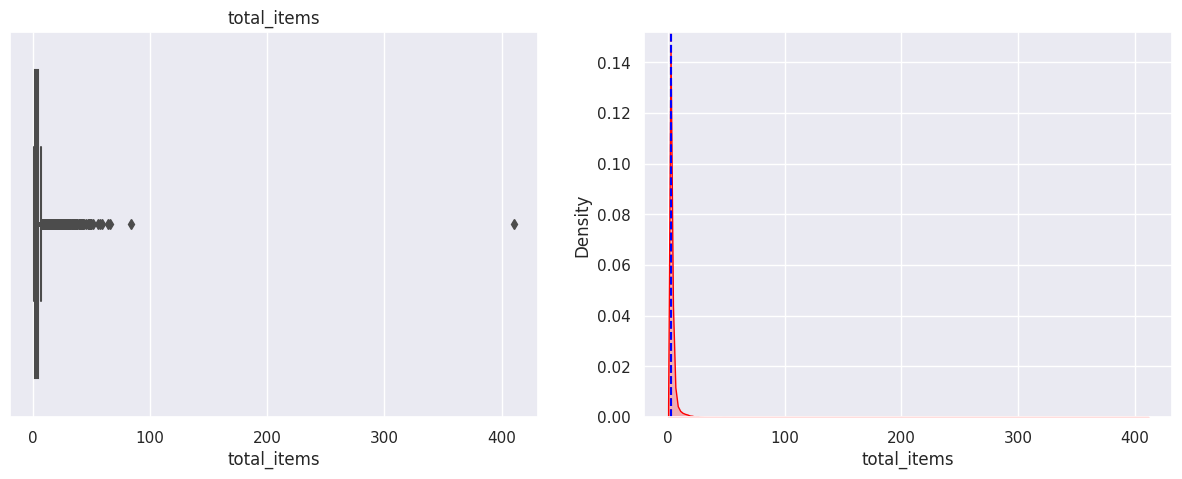

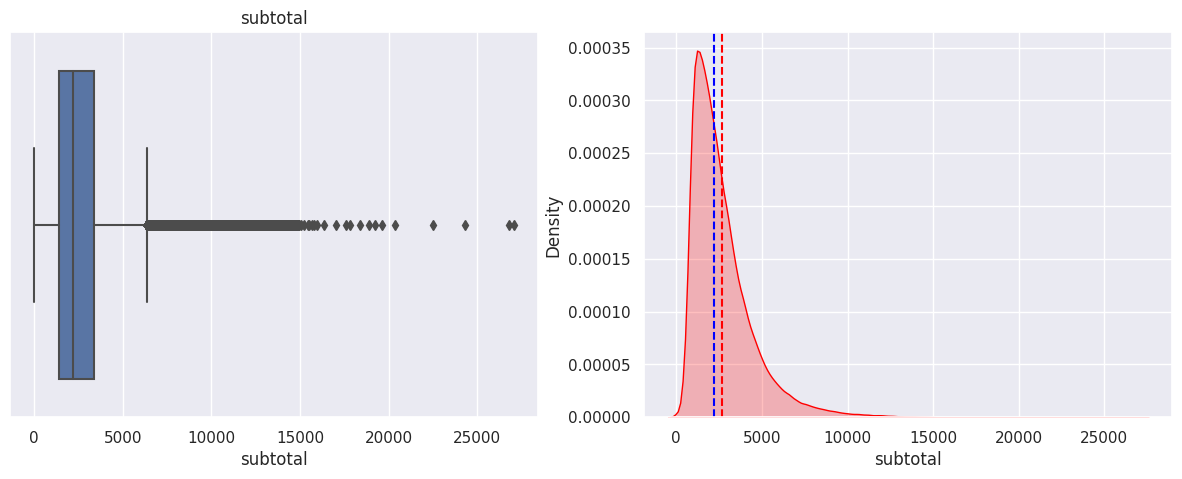

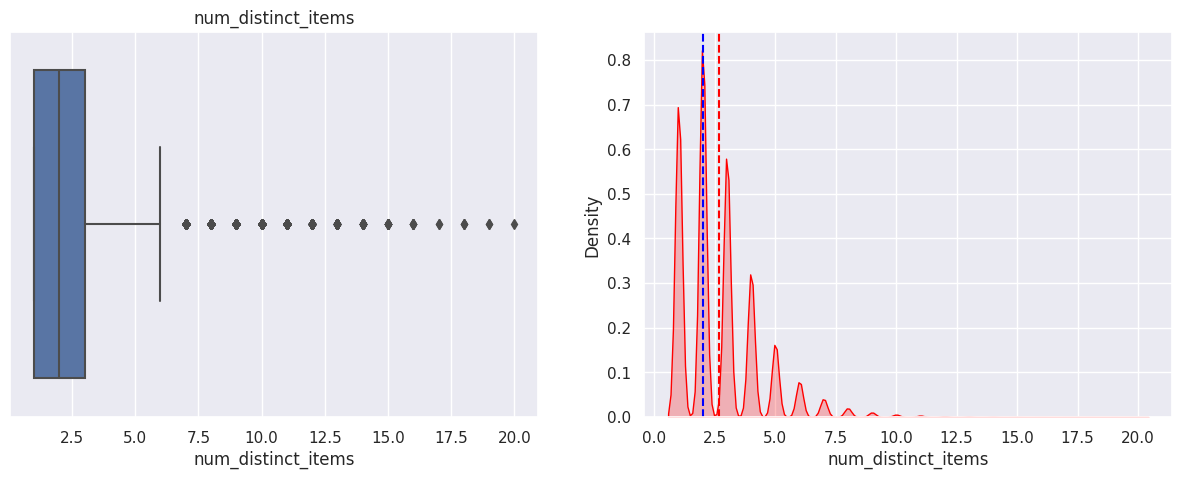

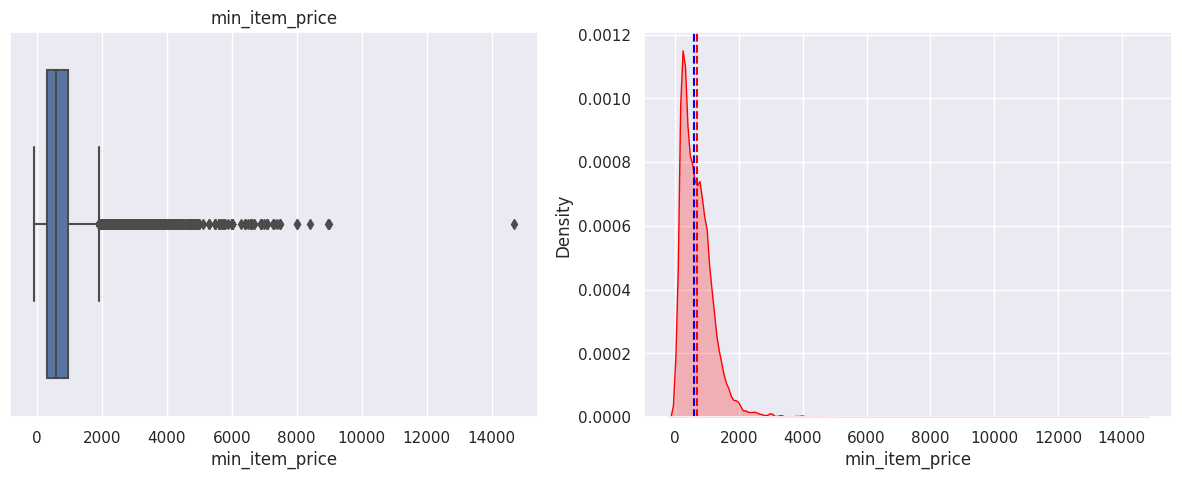

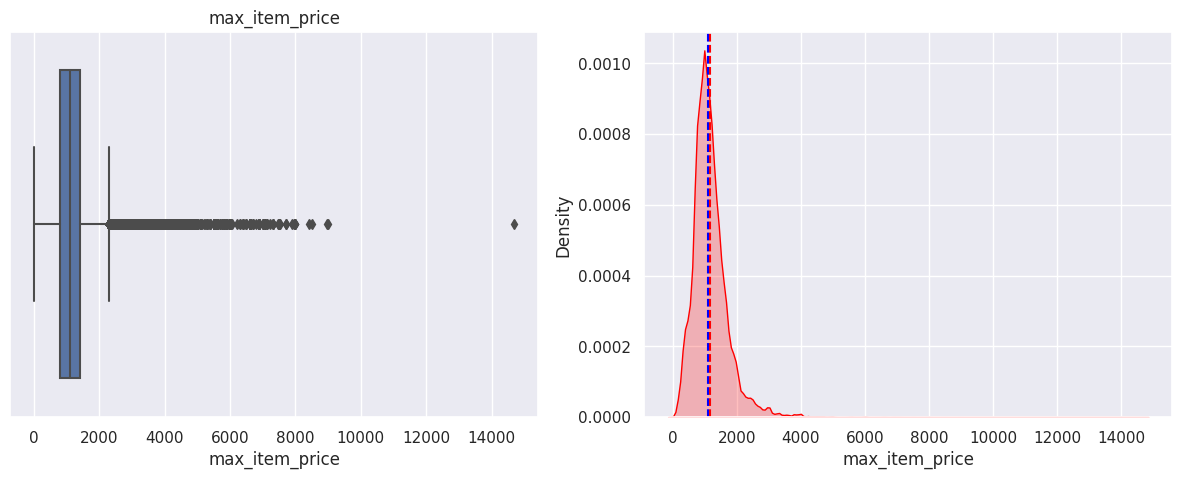

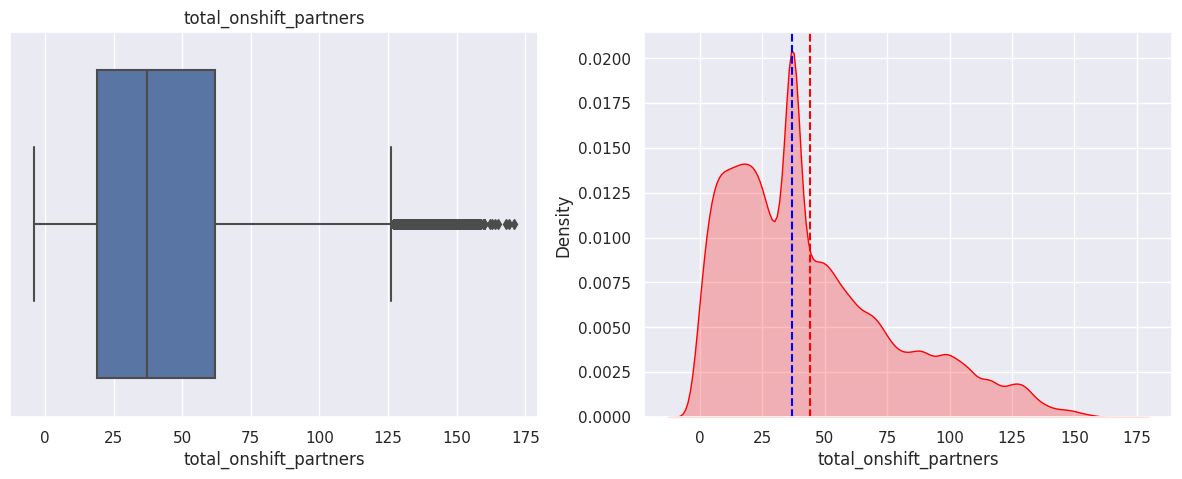

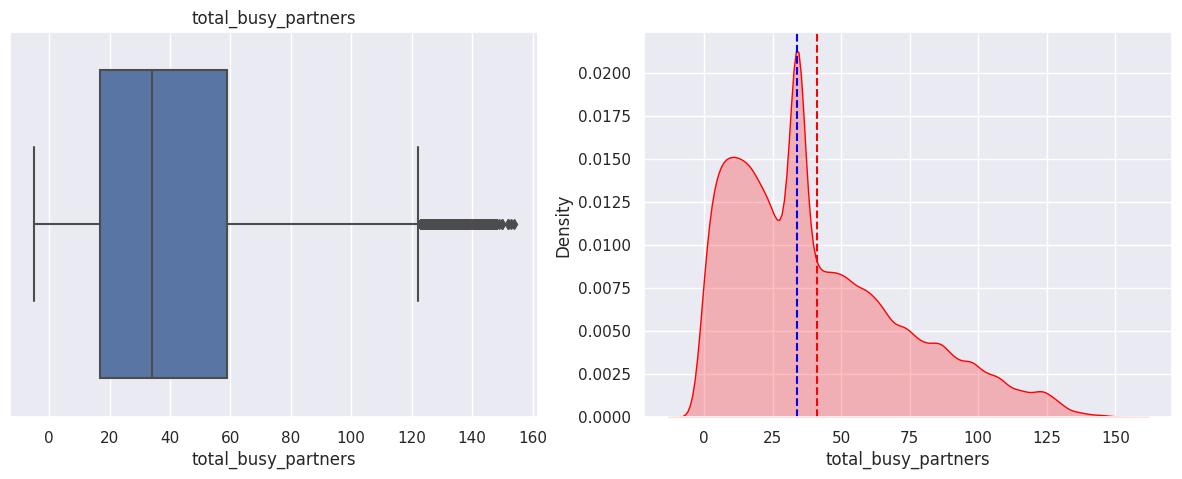

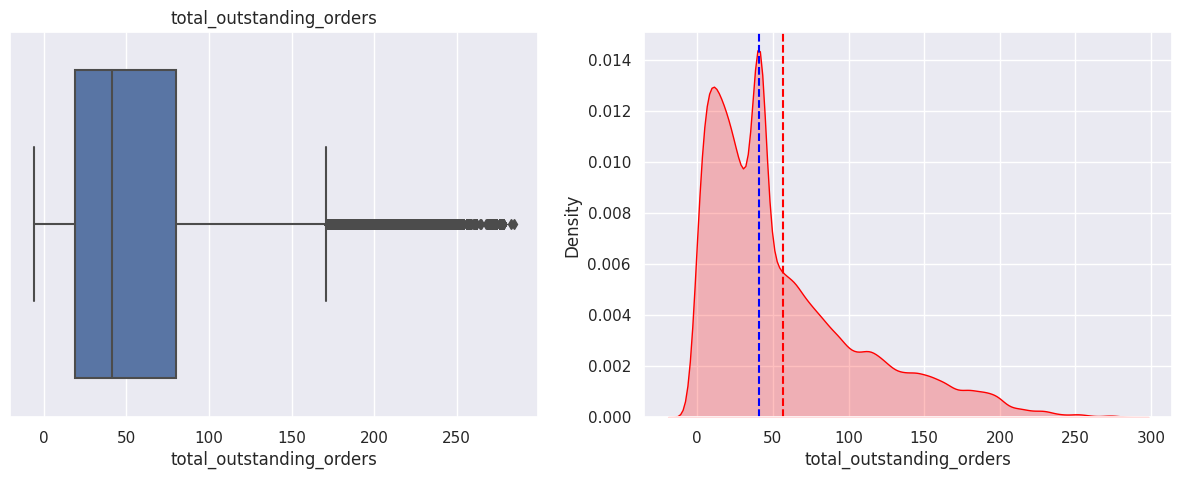

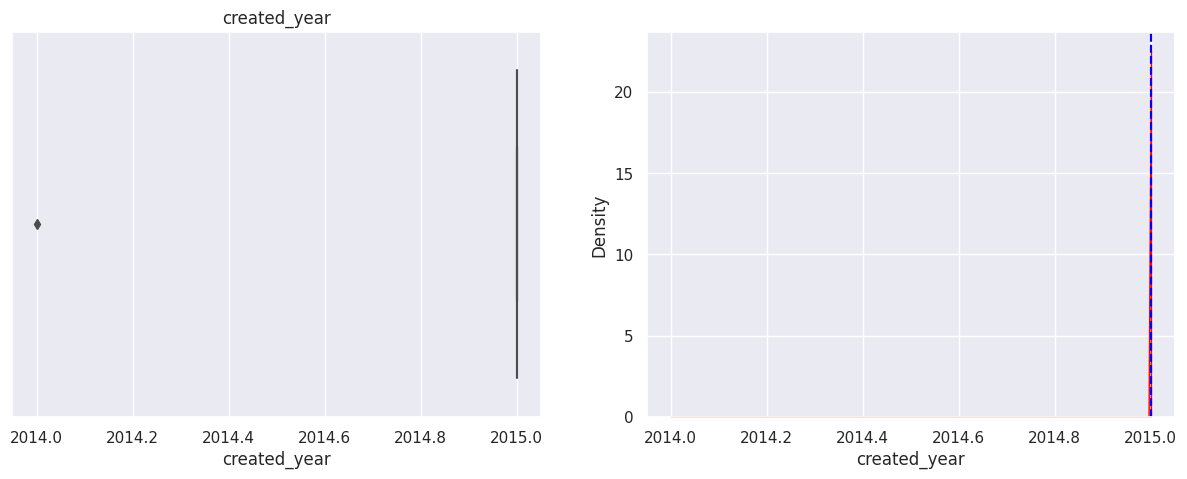

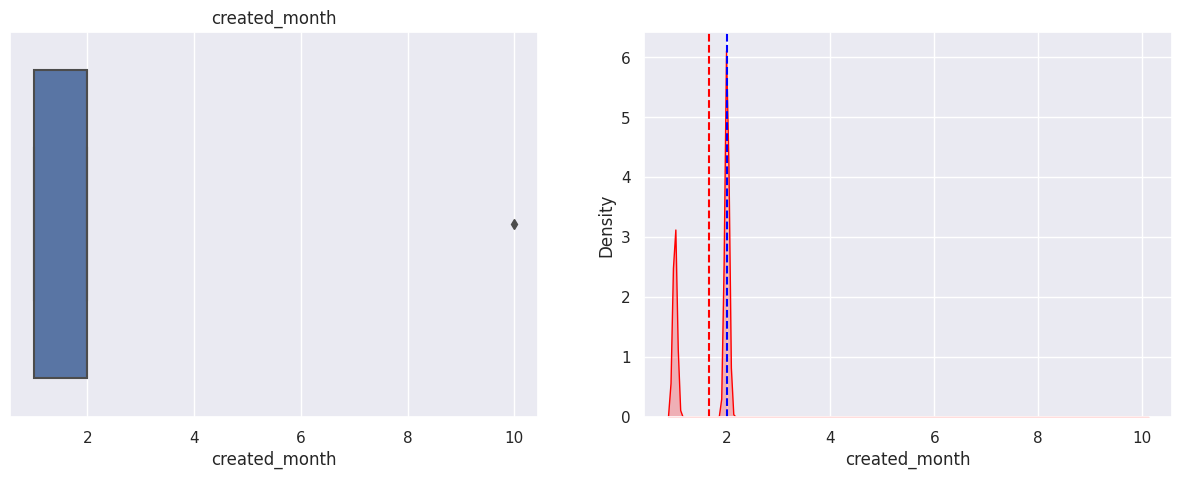

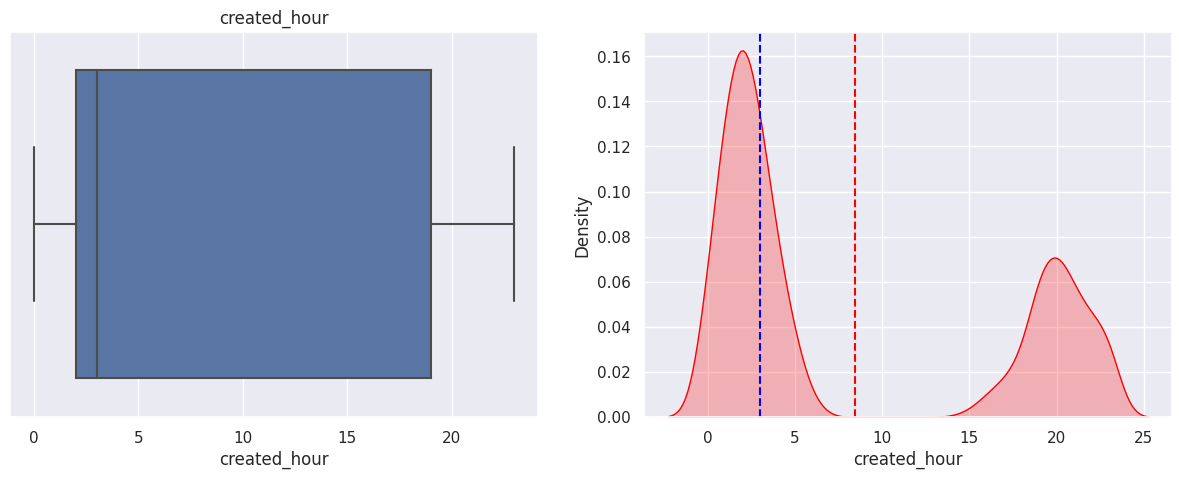

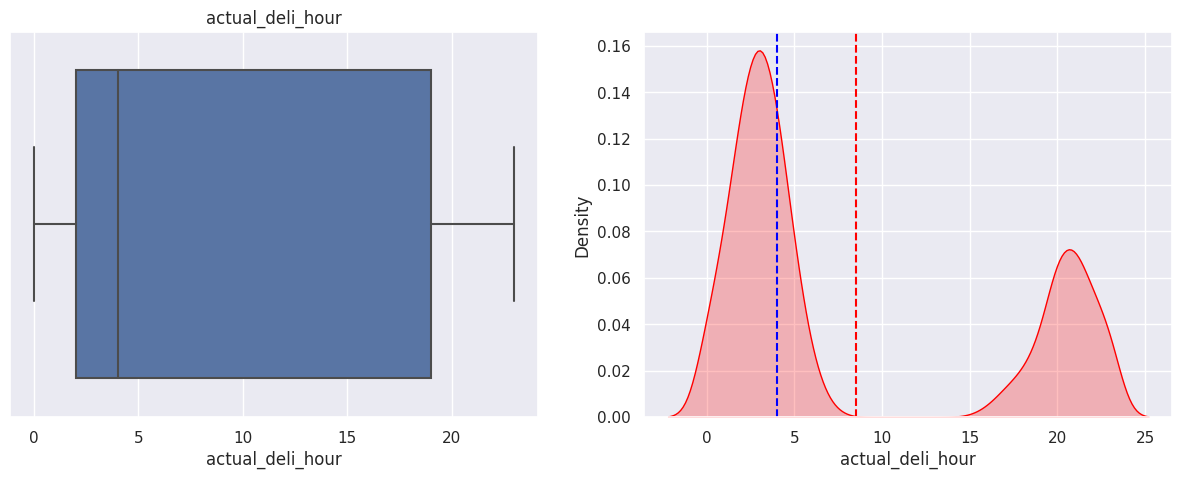

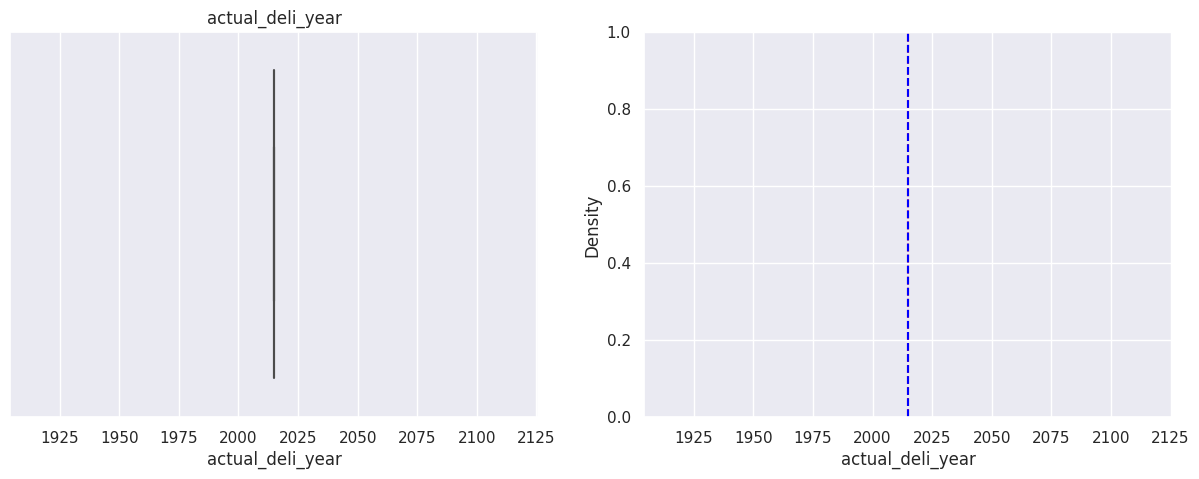

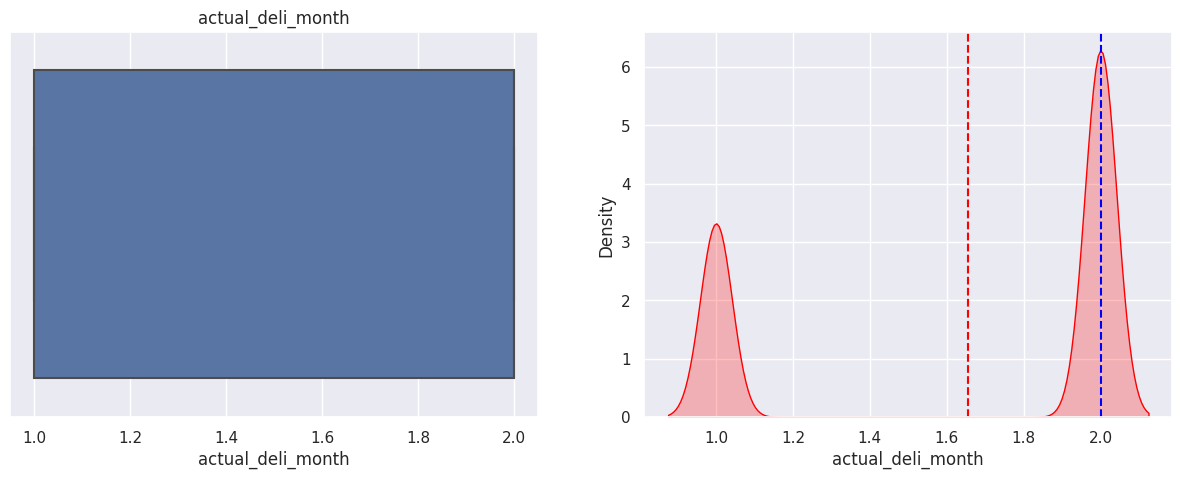

In [46]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (20, 6)

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

In [47]:
for i, j in enumerate(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders']):
  q1 = df[j].quantile(0.25)
  q3 = df[j].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  df = df[(df[j] >= lower_bound) & (df[j] <= upper_bound)]   

#Exploratory Data Analysis

## Univariate Analysis


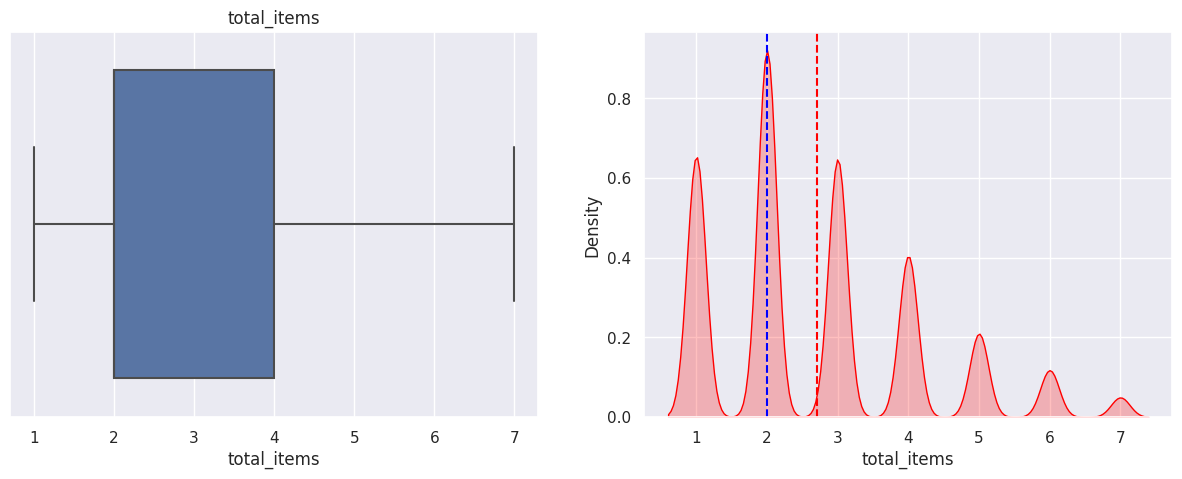

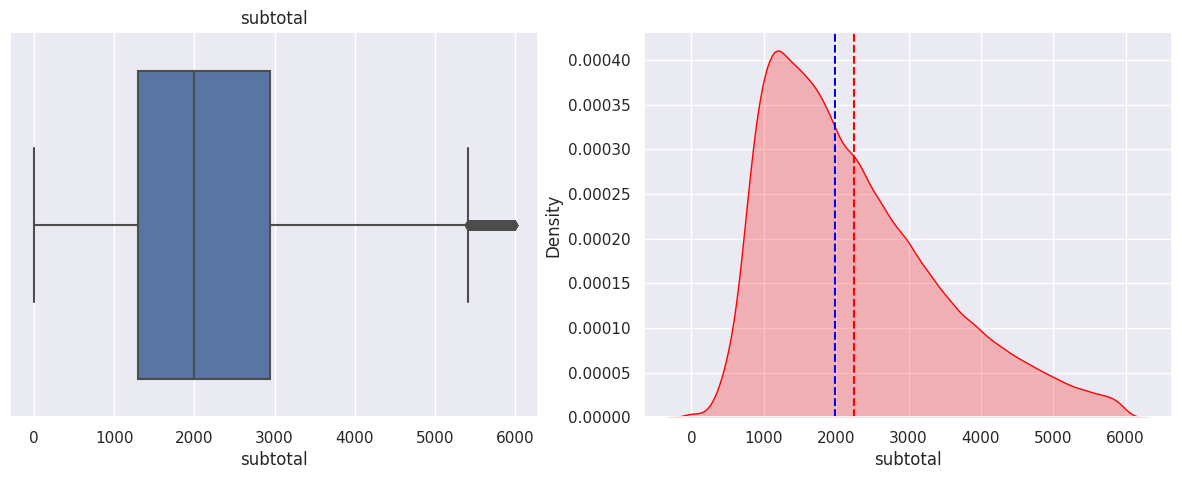

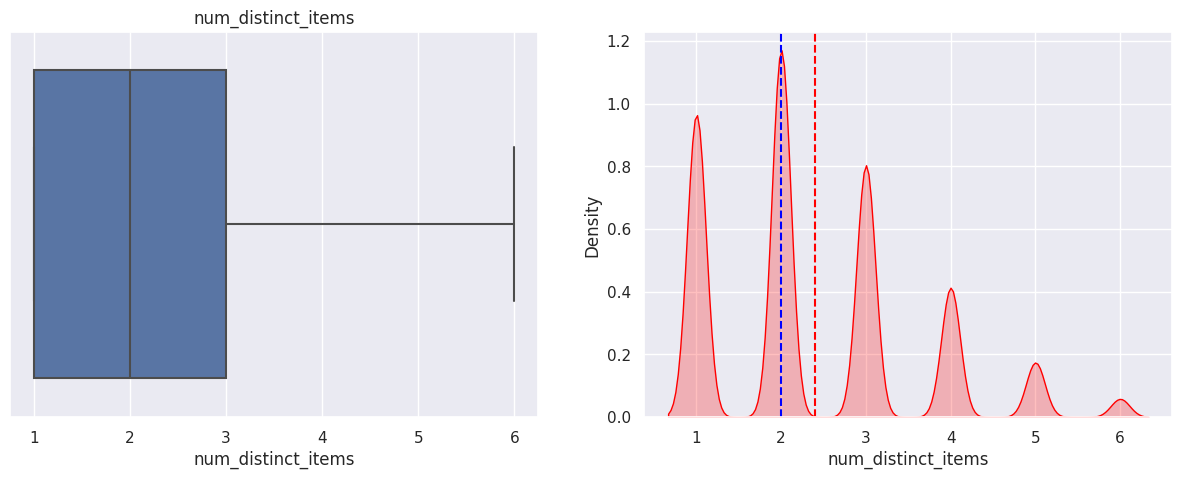

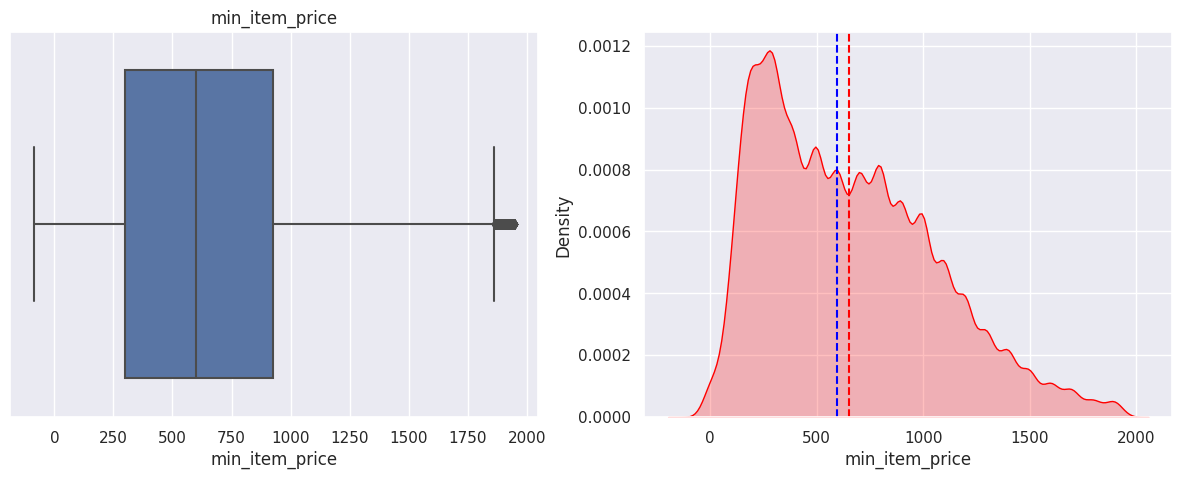

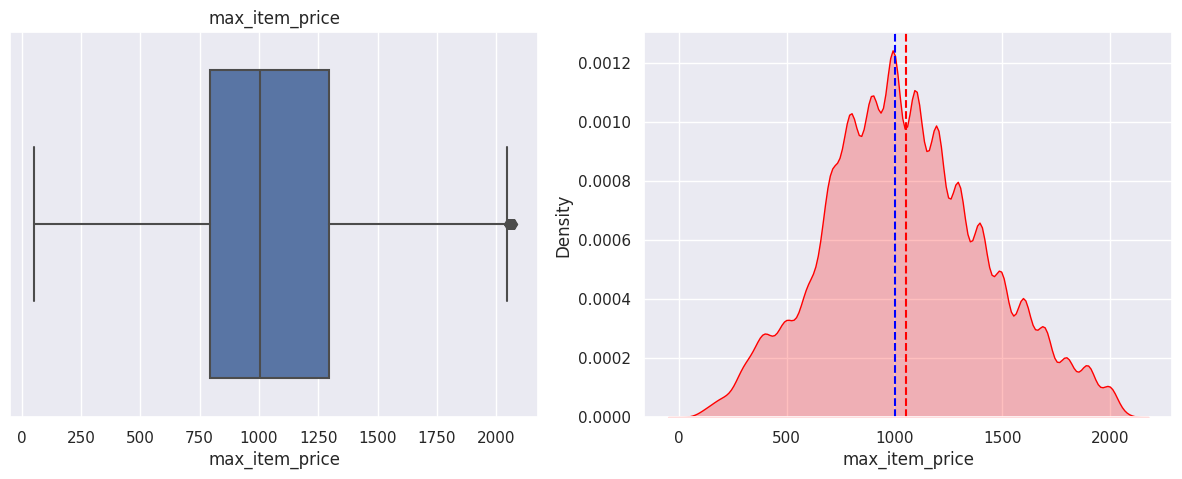

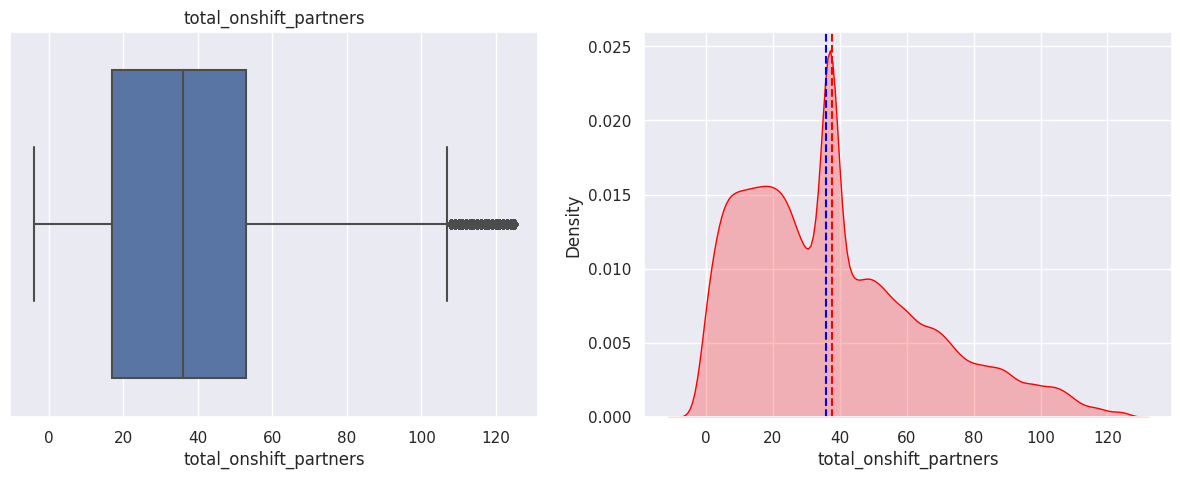

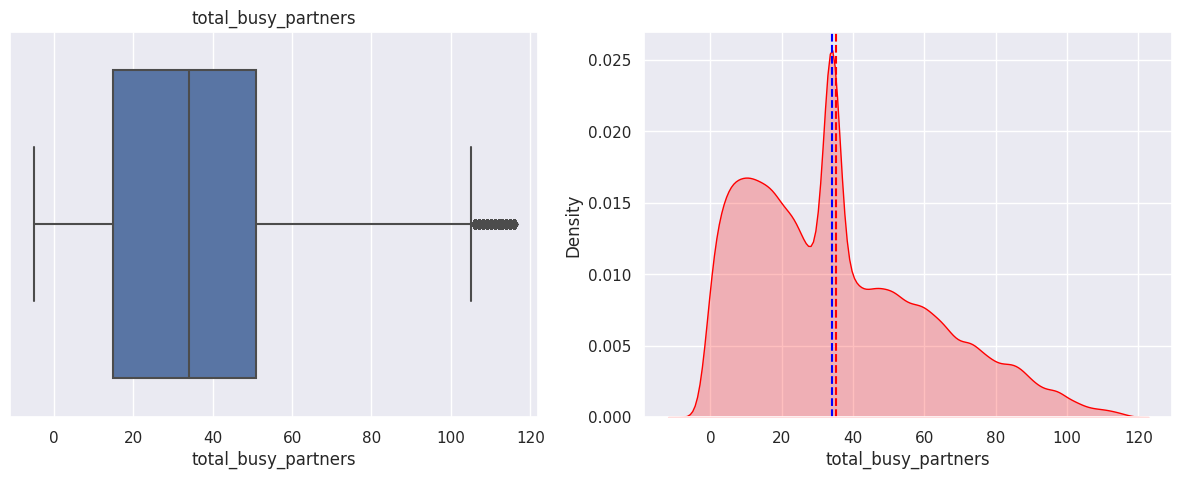

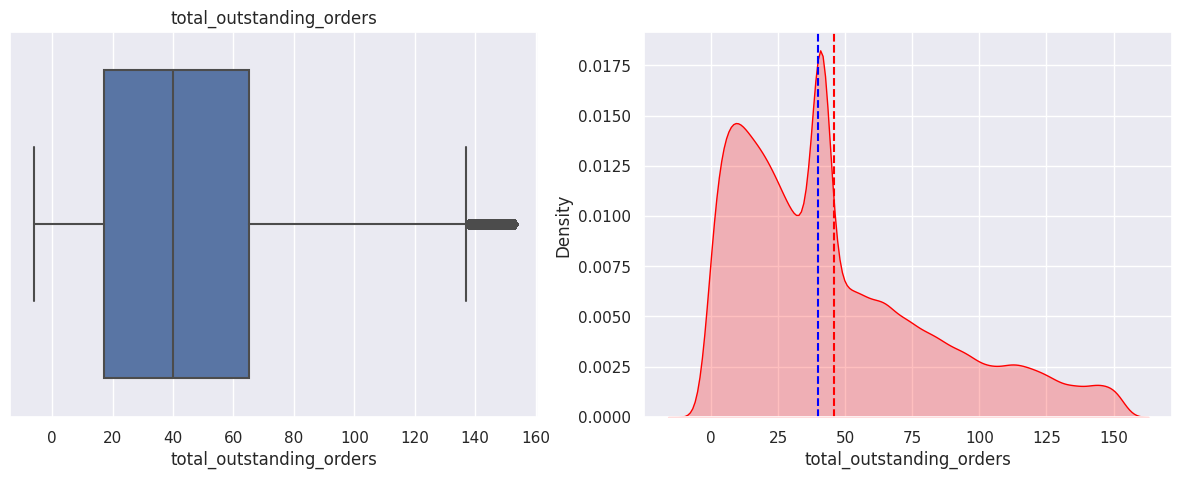

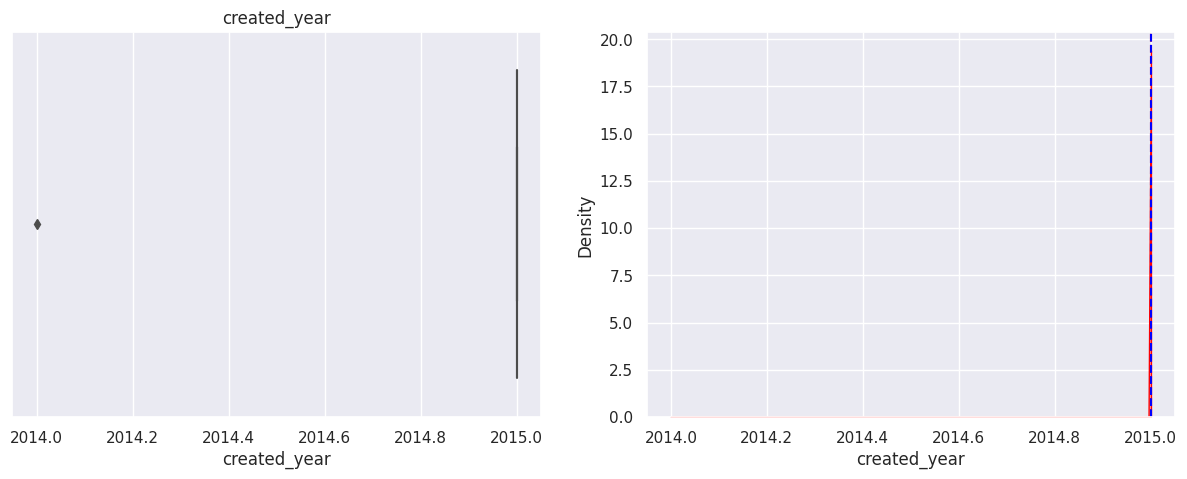

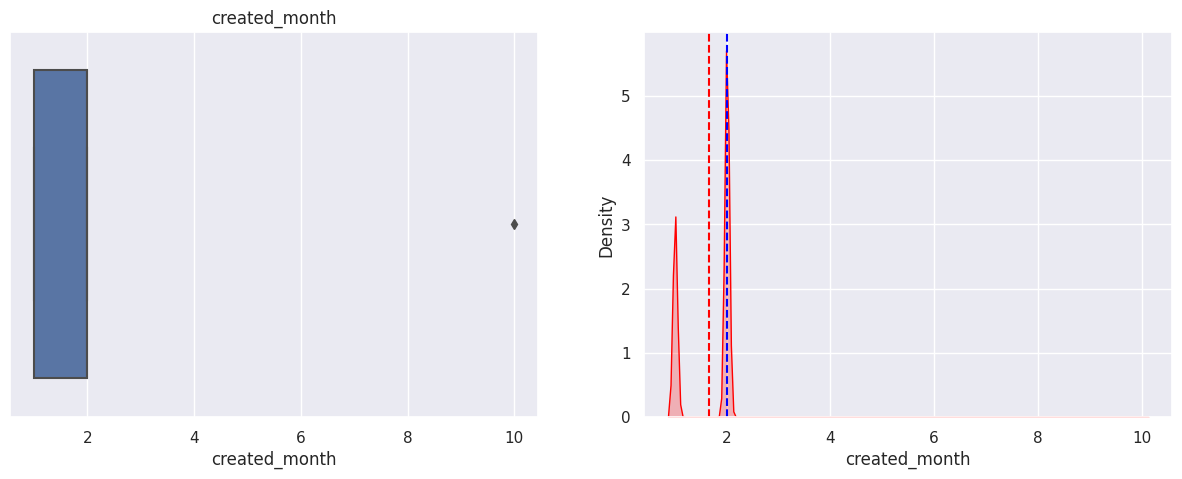

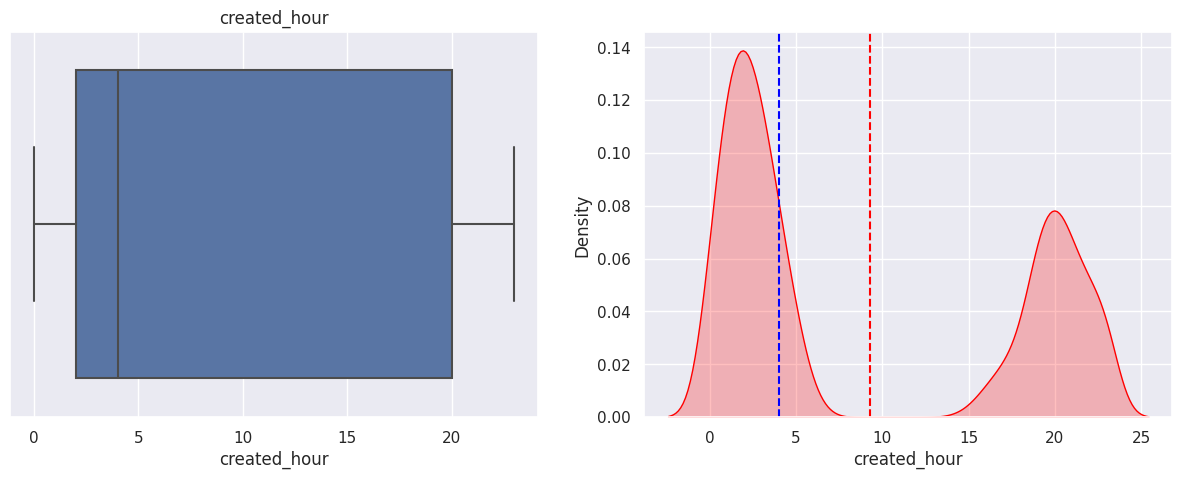

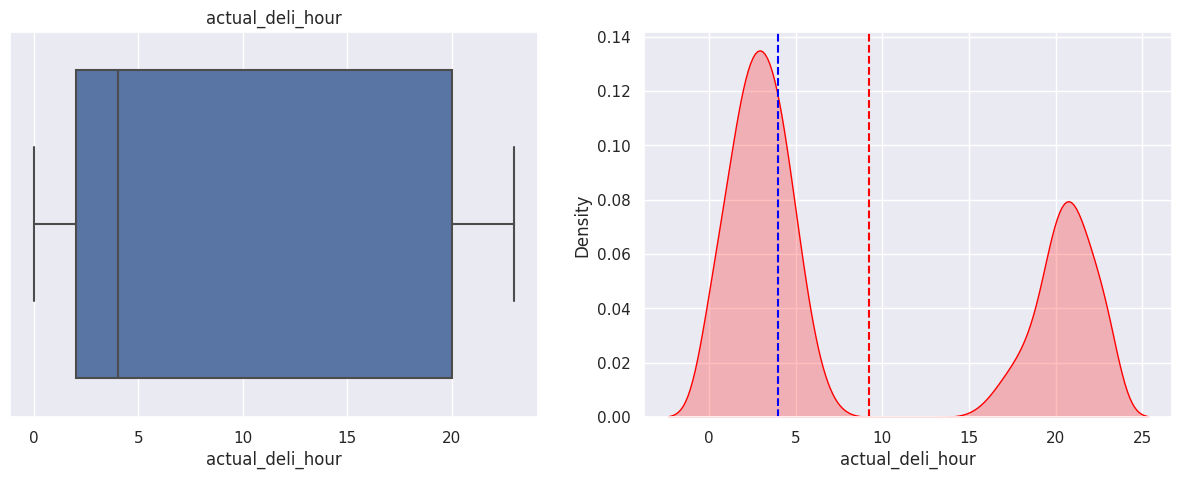

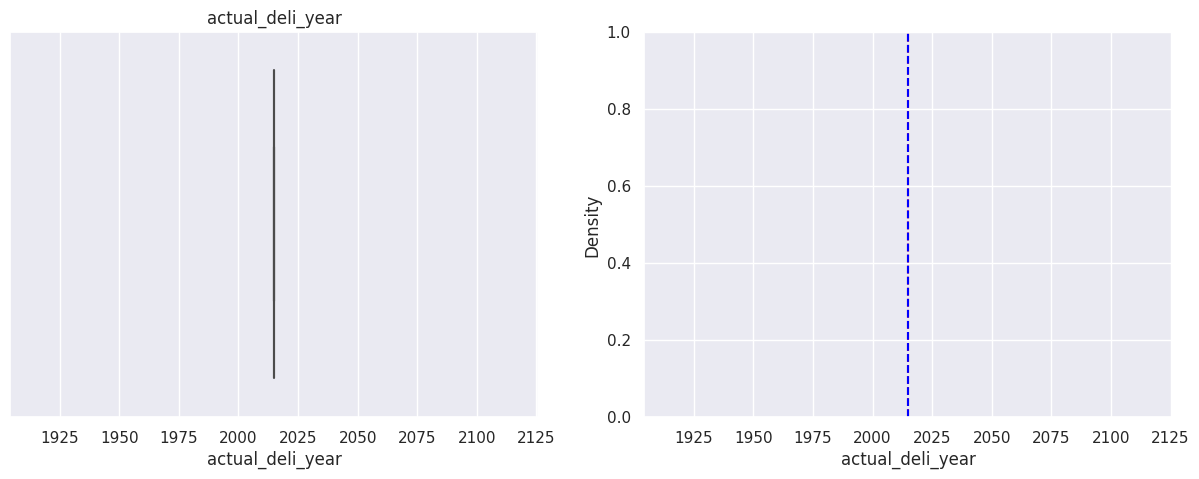

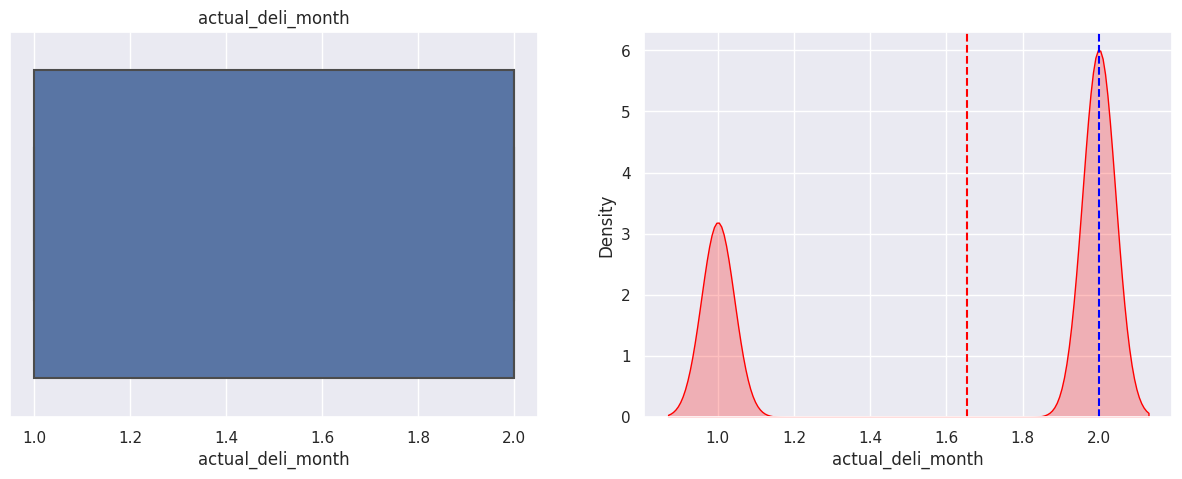

In [48]:
sns.set_theme(style='darkgrid')
# Create a cross-tabulation
for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

##Observation
* The peak hours for receiving more orders are between 1-6 AM and 3-11 PM.
* Created at only for January and February of the year 2015. 








## Bi-Variate Analysis


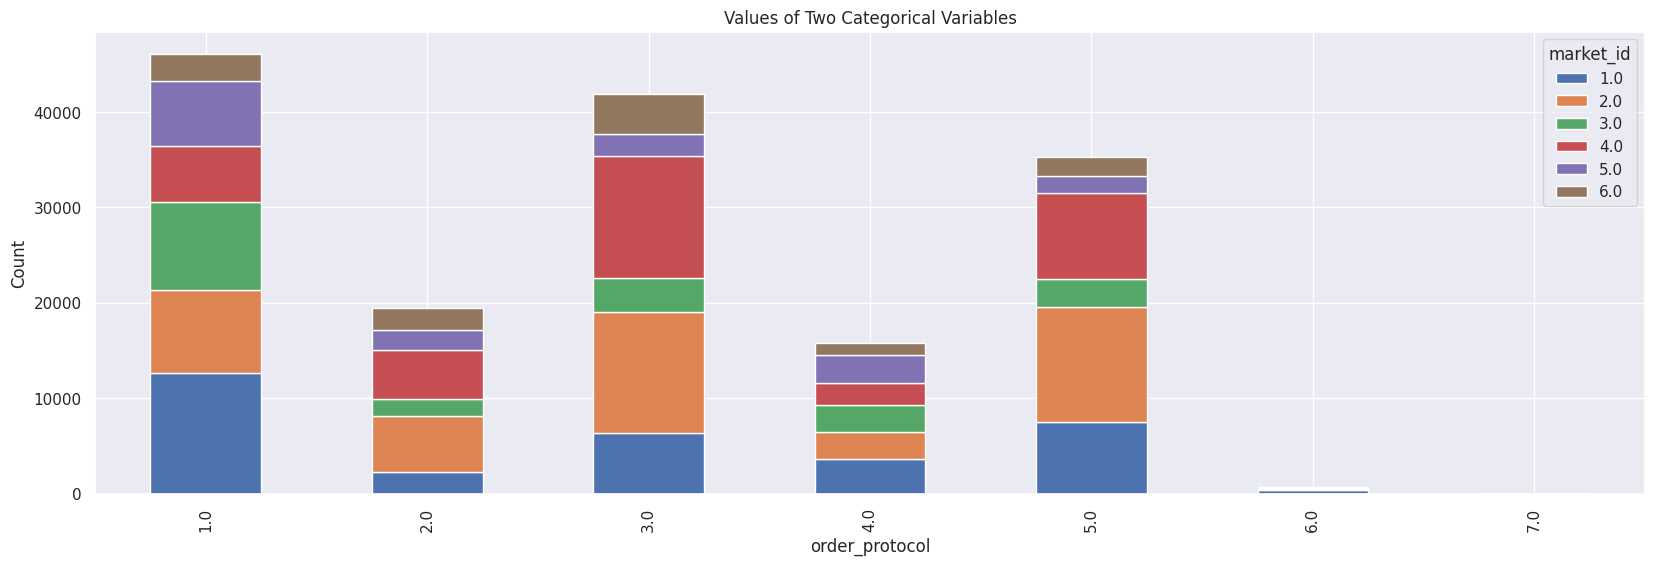

In [49]:
# Create a cross-tabulation
plt.rcParams['figure.figsize'] = (20, 6)
cross_tab = pd.crosstab(df['order_protocol'], df['market_id'])

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('order_protocol')
plt.ylabel('Count')
plt.title('Values of Two Categorical Variables')

# Display the plot
plt.show()

##Observation
* Has we can see Order_protocol for 6.0 and 7.0 is very minimal or not available.
* the most used Order_protocol are 1.0, 3.0 and 5.0.where as other two 2.0 and 4.0 are minimal.
* Market_id 1.0, 2.0 and 4.0 are more in all the order_protocol

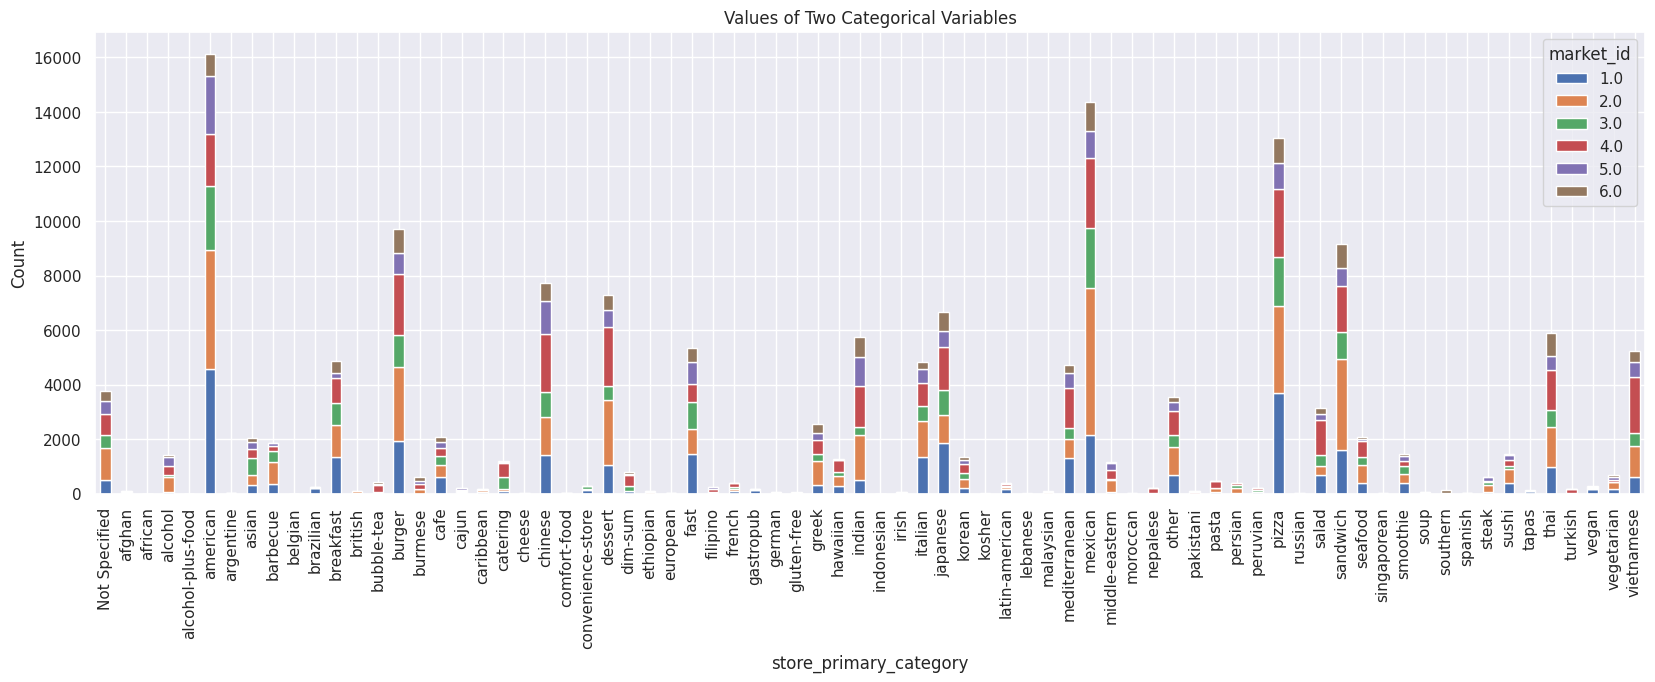

In [50]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['store_primary_category'], df['market_id'])

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('store_primary_category')
plt.ylabel('Count')
plt.title('Values of Two Categorical Variables')

# Display the plot
plt.show()

## Observation
* American, mexcian, Pizza, burger and sandwitch are highly ordered category irrespective to market_id


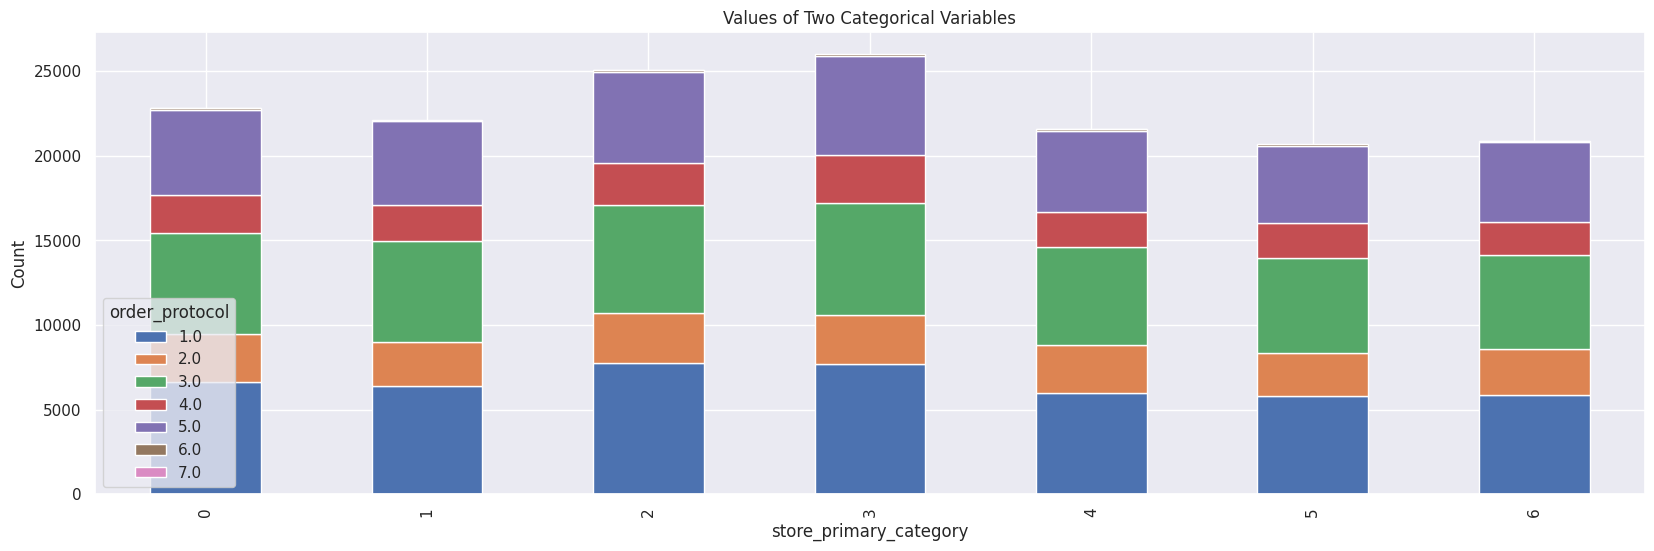

In [98]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['created_day_of_week'], df['order_protocol'])

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('store_primary_category')
plt.ylabel('Count')
plt.title('Values of Two Categorical Variables')

# Display the plot
plt.show()

#Observation
* Tuesday and wednesday are the most ordered Weekdays.

In [53]:
import plotly.express as px
# Calculate the counts
counts = df['created_hour'].value_counts().reset_index()
counts.columns = ['created_hour', 'Count']

# Create the count plot
fig = px.bar(counts, x='created_hour', y='Count')

# Add count labels on top of each bar
fig.update_traces(text=counts['Count'], textposition='outside')

# Update the layout
fig.update_layout(
    title='Count Plot',
    xaxis_title='created_hour',
    yaxis_title='Count'
)

# Show the plot
fig.show()


Based on the observation you provided:

* The peak hours for receiving more orders are between 1-6 AM and 3-11 PM.


In [61]:
new_df=df[['market_id', 'created_at', 'actual_delivery_time','store_primary_category', 'order_protocol', 'total_items', 'subtotal','num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_partners', 'total_busy_partners','total_outstanding_orders']]
new_df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:27:16               american   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29                mexican   
2       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09          Not Specified   
4       3.0 2015-02-15 02:40:36  2015-02-15 03:20:26          Not Specified   
5       3.0 2015-01-28 20:30:38  2015-01-28 21:08:58          Not Specified   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            1.0            1      1900                   1            1900   
4            1.0            3      3900                   3            1100   
5            1.0            3      5000                   3            1500   

   max_item_price  total_onshift_partners  total_busy_partners  \
0            1239                    33.0                 14.0   
1            1400                     1.0                  2.0   
2            1900                     1.0                  0.0   
4            1600                     6.0                  6.0   
5            1900                     2.0                  2.0   

   total_outstanding_orders  
0                      21.0  
1                       2.0  
2                       0.0  
4                       9.0  
5                       2.0

# Multi-Variate Analysis

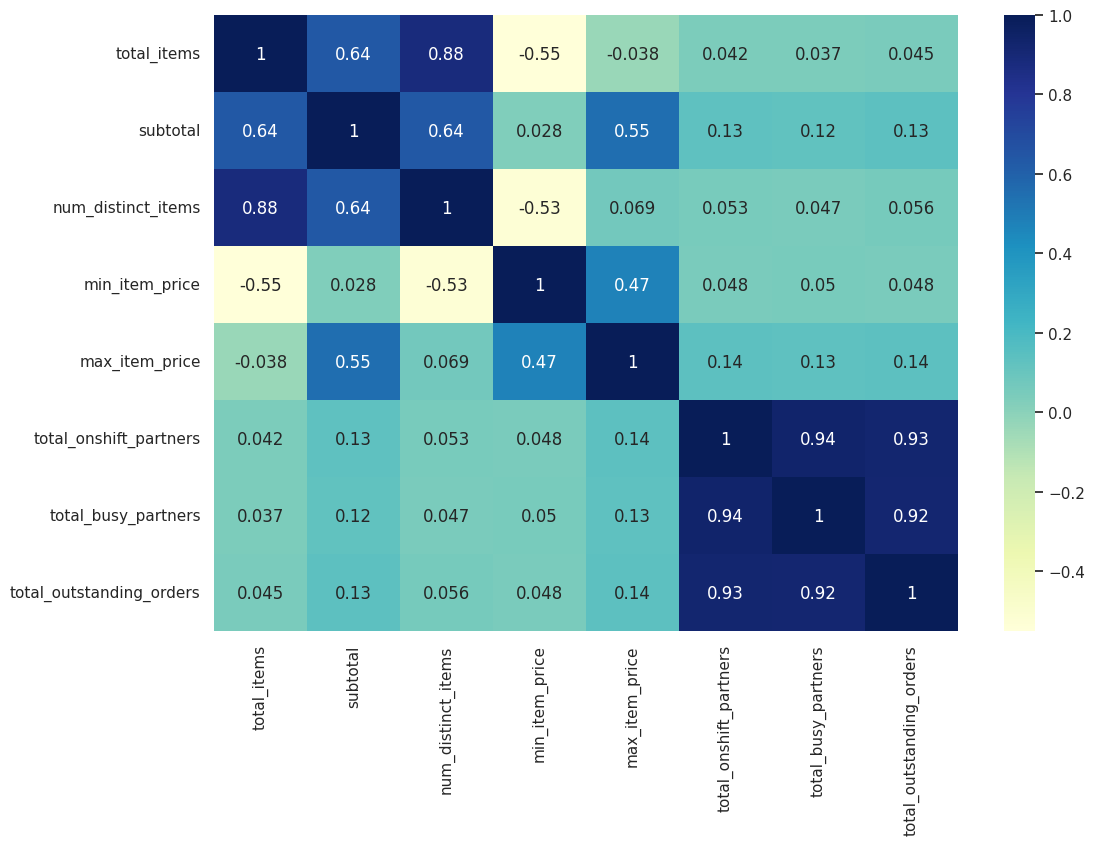

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, cmap="YlGnBu")
plt.show()
     

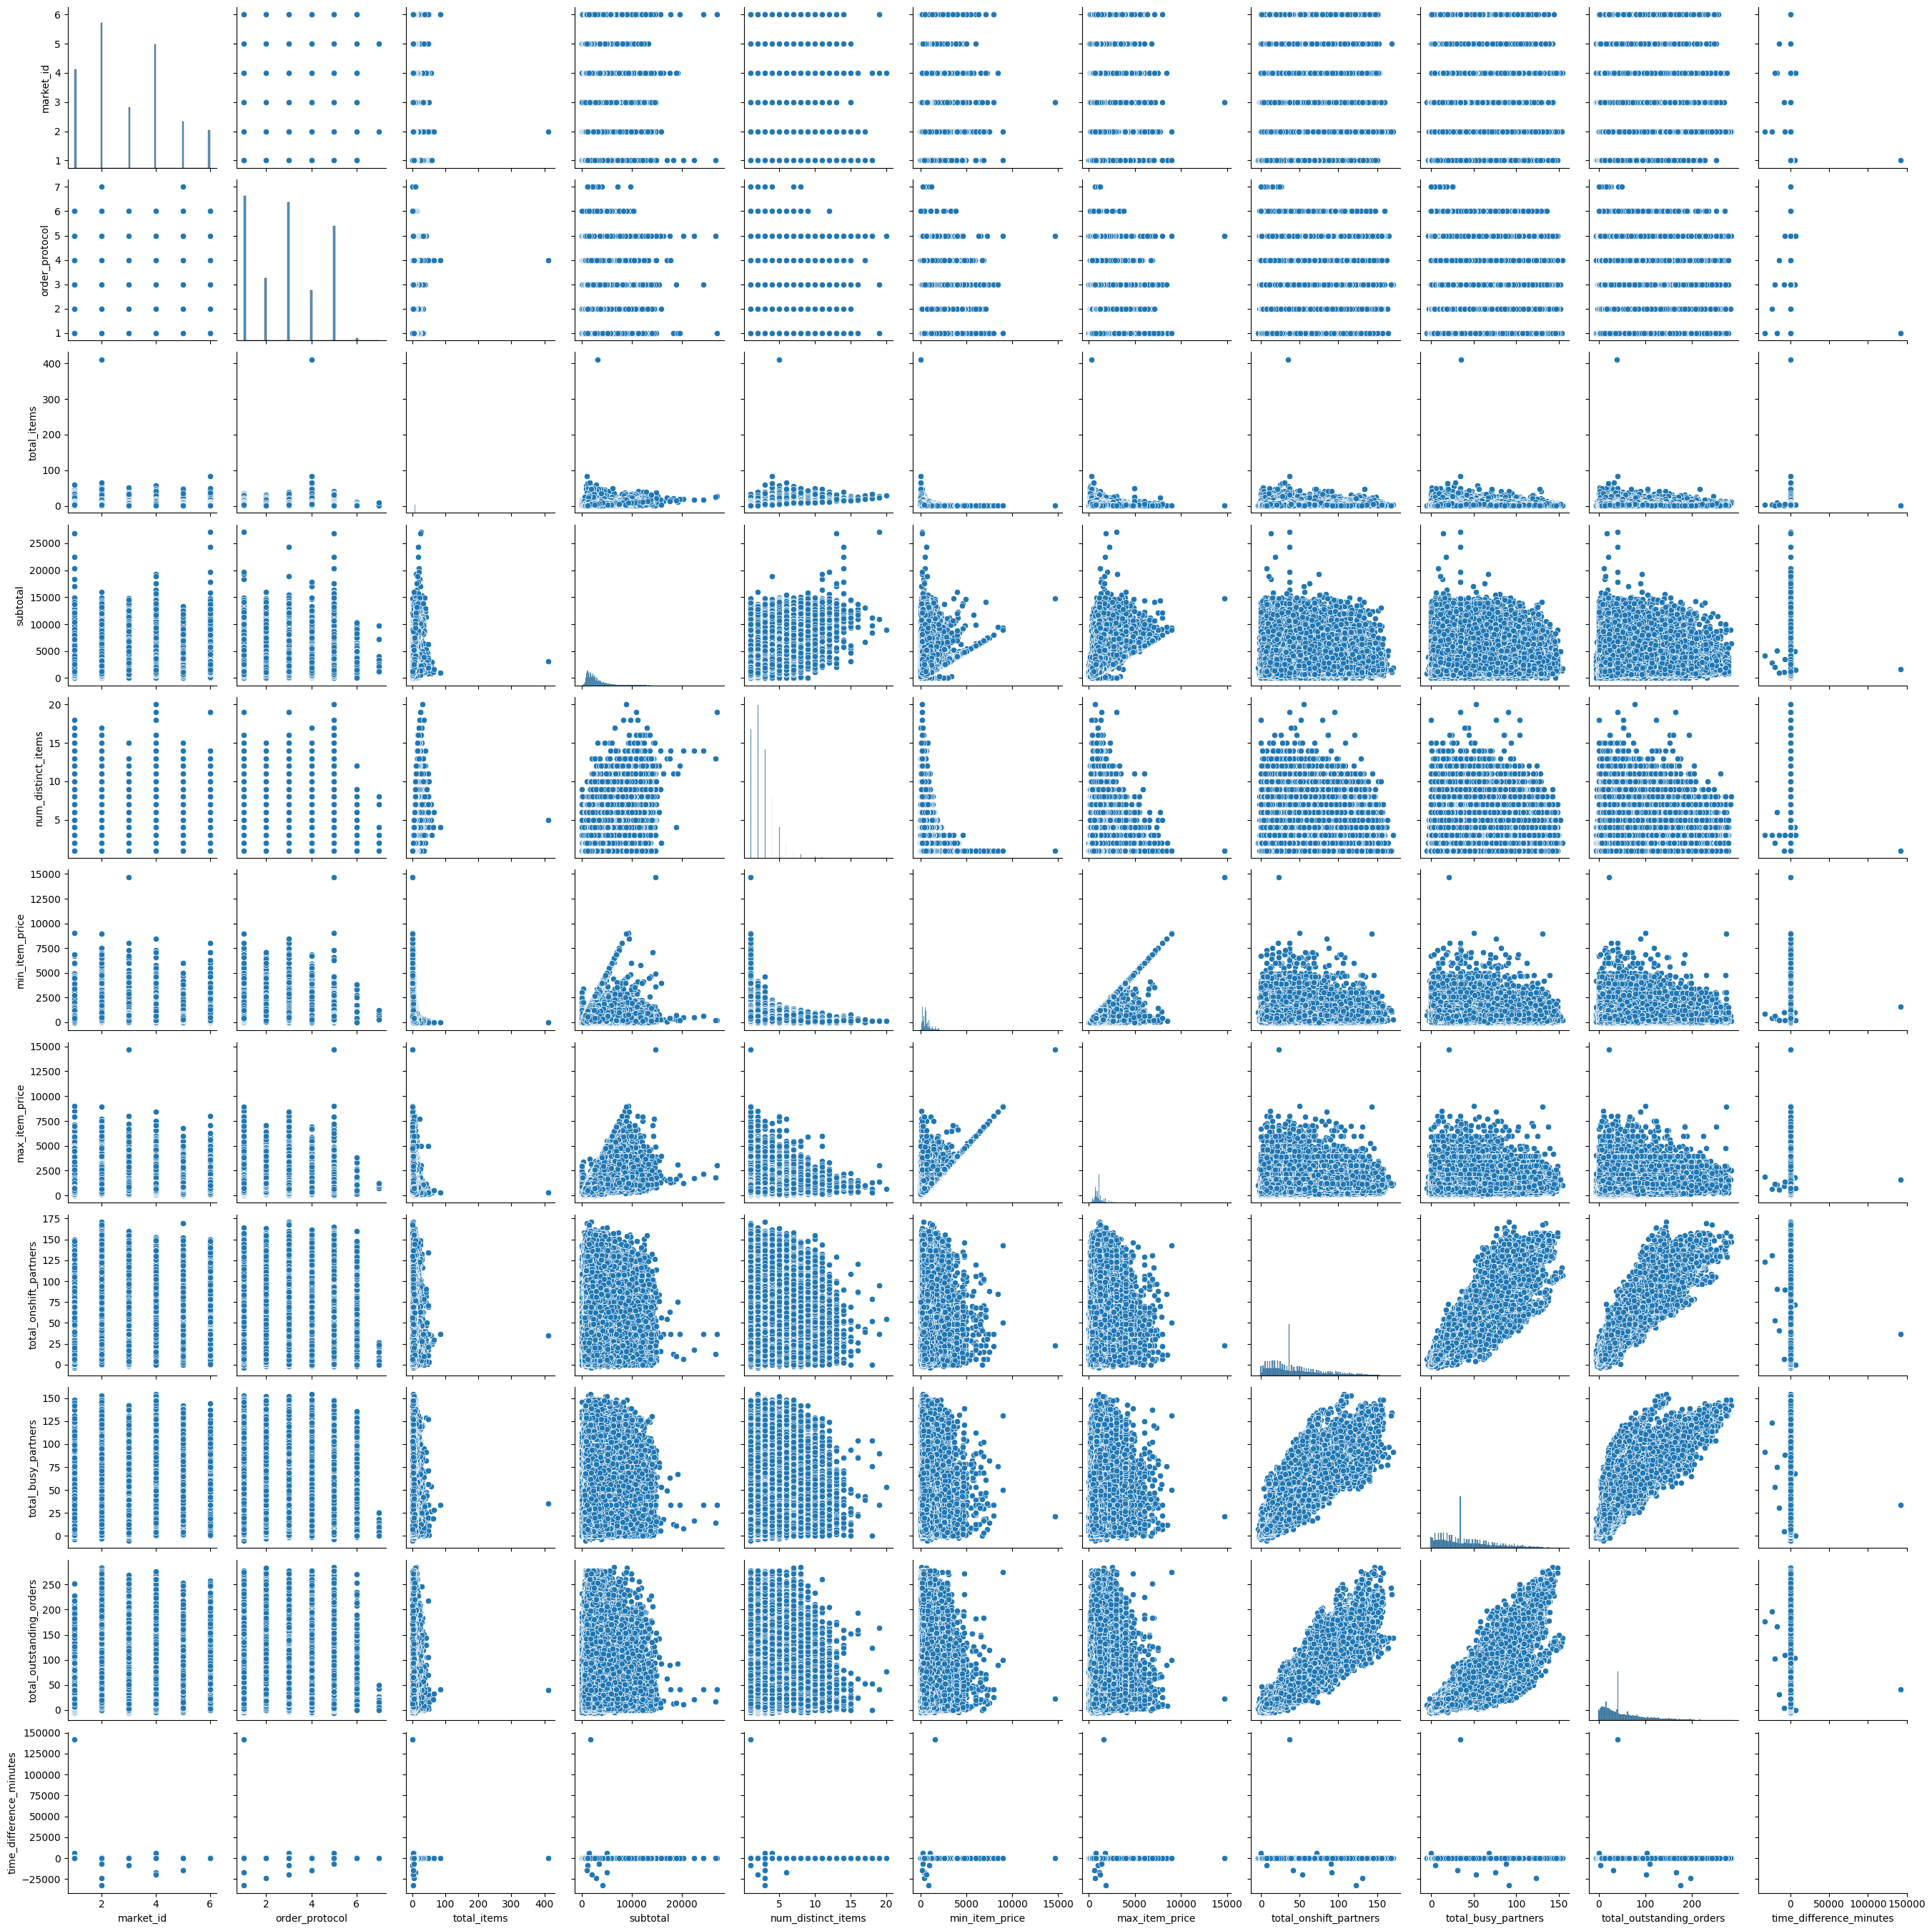

In [ ]:
sns.pairplot(df)

In [71]:


# Create a scatter plot with hue
fig = px.scatter(x=df['total_busy_partners'],y=df['total_outstanding_orders'],color=df['market_id'])
#fig = px.scatter(x=df['total_busy_partners'],y=df['total_outstanding_orders'], color=['market_id'])

# Display the plot
fig.show()

In [73]:
fig=px.scatter(x=df['total_onshift_partners'],y=df['total_outstanding_orders'],color=df['market_id'])
fig.show()

In [74]:
fig=px.scatter(x=df['total_onshift_partners'],y=df['total_outstanding_orders'],color=df['order_protocol'])
fig.show()

In [63]:
df_work=df.copy()

#Label Encoding


In [64]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in ['store_primary_category','created_day_of_week','actual_delivery_day_of_week']:
    if df[column].dtype == 'object':  # Check if column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

In [65]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:27:16                       5   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29                      47   
2       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09                       0   
4       3.0 2015-02-15 02:40:36  2015-02-15 03:20:26                       0   
5       3.0 2015-01-28 20:30:38  2015-01-28 21:08:58                       0   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            1.0            1      1900                   1            1900   
4            1.0            3      3900                   3            1100   
5            1.0            3      5000                   3            1500   

   max_item_price  ...  created_year  created_month  created_hour  \
0            1239  ...          2015              2            22   
1            1400  ...          2015              2            21   
2            1900  ...          2015              1            20   
4            1600  ...          2015              2             2   
5            1900  ...          2015              1            20   

  actual_delivery_date  actual_deli_hour  actual_deli_year  actual_deli_month  \
0           2015-02-06                23              2015                  2   
1           2015-02-10                22              2015                  2   
2           2015-01-22                21              2015                  1   
4           2015-02-15                 3              2015                  2   
5           2015-01-28                21              2015                  1   

  delivery_time  created_day_of_week  actual_delivery_day_of_week  
0     62.983333                    0                            0  
1     67.066667                    5                            5  
2     29.683333                    4                            4  
4     39.833333                    3                            3  
5     38.333333                    6                            6  

[5 rows x 24 columns]

In [66]:
X = df.drop(columns=['created_at','actual_delivery_time','delivery_time','created_date','actual_delivery_date'])

y = df['delivery_time']

In [67]:
import statsmodels.api as sm
xt = sm.add_constant(X)

model = sm.OLS(y, xt.astype(float)).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 2.090e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        07:21:06   Log-Likelihood:            -9.0957e+05
No. Observations:              159244   AIC:                         1.819e+06
Df Residuals:                  159225   BIC:                         1.819e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
market_id         

In [68]:
X = df.drop(columns=['store_primary_category','total_items','num_distinct_items','min_item_price','max_item_price','created_at','actual_delivery_time','delivery_time','created_date','actual_delivery_date'])

In [70]:
X.head()

market_id order_protocol  subtotal  total_onshift_partners  \
0       1.0            1.0      3441                    33.0   
1       2.0            2.0      1900                     1.0   
2       3.0            1.0      1900                     1.0   
4       3.0            1.0      3900                     6.0   
5       3.0            1.0      5000                     2.0   

   total_busy_partners  total_outstanding_orders  created_year  created_month  \
0                 14.0                      21.0          2015              2   
1                  2.0                       2.0          2015              2   
2                  0.0                       0.0          2015              1   
4                  6.0                       9.0          2015              2   
5                  2.0                       2.0          2015              1   

   created_hour  actual_deli_hour  actual_deli_year  actual_deli_month  \
0            22                23              2015                  2   
1            21                22              2015                  2   
2            20                21              2015                  1   
4             2                 3              2015                  2   
5            20                21              2015                  1   

   created_day_of_week  actual_delivery_day_of_week  
0                    0                            0  
1                    5                            5  
2                    4                            4  
4                    3                            3  
5                    6                            6

# Splitting Train-Val-Test Dataset

In [71]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (128987, 14) (128987,)
Validation: (14332, 14) (14332,)
Test  :  (15925, 14) (15925,)


# Standardization of Dataset


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Randam Forest Regressor

In [73]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training set
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_regressor.predict(X_val)

# Make predictions on the testing set
y_test_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {val_mse}")
r2 = r2_score(y_val, y_val_pred)
print(f"R-squared: {r2}")

# Calculate the mean squared error on the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error: {test_mse}")
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared: {r2}")

Validation Mean Squared Error: 2776.3042375609184
R-squared: 0.07379906524610391
Testing Mean Squared Error: 283.6680222226955
R-squared: 0.13548322547969338


In [74]:
def metrics_evals(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE":mse, 
            "RMSE":rmse, 
            "MAE":mae, 
            "R2":r2}

In [75]:
# Create a dataframe with predicted and actual values
Val_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_val_pred.flatten()})
Val_df

Actual  Predicted
166838  32.566667  33.441833
158594  22.200000  35.600250
75716   64.466667  55.481667
19194   63.200000  46.241667
14205   47.100000  46.077667
...           ...        ...
163378  20.050000  28.126667
171142  41.100000  44.716167
91079   35.850000  30.263333
60220   38.266667  38.989000
9712    25.666667  34.221333

[14332 rows x 2 columns]

In [77]:
# Create a dataframe with predicted and actual values
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred.flatten()})
test_df

Actual  Predicted
152801  41.650000  40.164333
60578   45.700000  43.243333
161689  42.483333  42.358500
24780   33.450000  48.601333
160422  15.583333  38.080667
...           ...        ...
142931  63.883333  57.535167
84196   32.150000  39.061667
181644  84.233333  47.768333
112686  50.333333  46.548500
6875    42.250000  42.583500

[15925 rows x 2 columns]

Text(0.5, 0, 'Prediction Level')

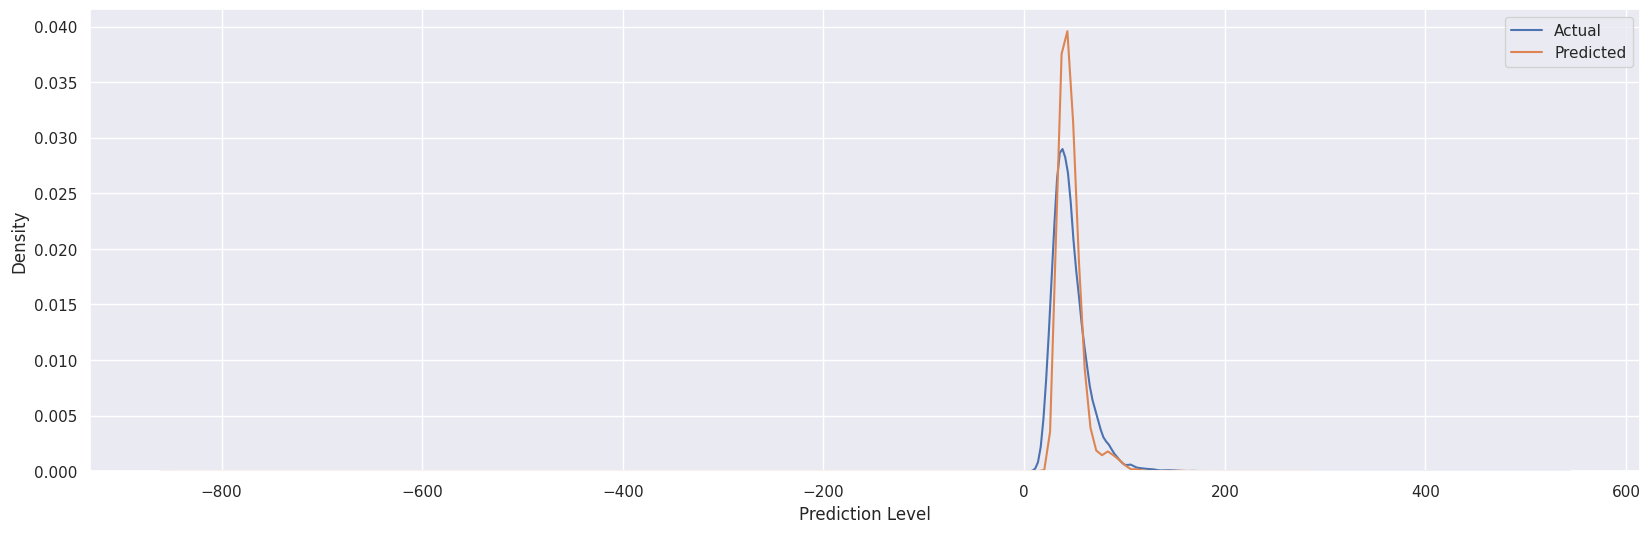

In [78]:
sns.distplot(test_df['Actual'], hist=False, label='Actual')
sns.distplot(test_df['Predicted'], hist=False, label='Predicted')
plt.legend(loc='upper right')
plt.xlabel('Prediction Level')

# Neural Networks Model

In [79]:
import tensorflow as tf
from tensorflow.keras import Sequential
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model

# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
tf.random.set_seed(123)

inputs = Input(shape=(X_train.shape[1],))

x = Dense(units=64, activation="relu")(inputs)
x = Dropout(rate=0.20)(x)

x = Dense(units=64, activation="relu")(x)
x = Dropout(rate=0.20)(x)

x = Dense(units=64, activation="relu")(x)
x = Dropout(rate=0.20)(x)

output = Dense(units= 1)(x) 

model_dense = Model(inputs=inputs, outputs=output, name="model_dense")

model_dense.compile(optimizer = tf.keras.optimizers.Adam(), 
                    loss = "mean_squared_error", 
                    metrics = ['mae','Precision','Recall','accuracy'])

In [88]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [89]:

history = model_dense.fit(X_train, 
                          y_train, 
                          validation_data = (X_test, y_test), 
                          batch_size = 256, 
                          epochs = 50, 
                          verbose = 1, 
                          callbacks = [create_model_checkpoint(model_name = model_dense.name)])

Epoch 1/50
497/504 [============================>.] - ETA: 0s - loss: 163630.7500 - mae: 18.2568 - precision: 1.0000 - recall: 0.9847 - accuracy: 0.0000e+00

504/504 [==============================] - 6s 9ms/step - loss: 161409.4531 - mae: 18.2001 - precision: 1.0000 - recall: 0.9850 - accuracy: 0.0000e+00 - val_loss: 297.9130 - val_mae: 12.3417 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
499/504 [============================>.] - ETA: 0s - loss: 159058.4688 - mae: 15.0172 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00

504/504 [==============================] - 4s 8ms/step - loss: 157529.1719 - mae: 15.0137 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 294.7247 - val_mae: 12.3711 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
499/504 [============================>.] - ETA: 0s - loss: 154369.7812 - mae: 15.1413 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00

504/504 [==============================] - 5s 9ms/step - loss: 152885.1094 - mae: 15.1214 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 286.5852 - val_mae: 11.6986 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
500/504 [============================>.] - ETA: 0s - loss: 148433.0625 - mae: 15.1135 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00

504/504 [==============================] - 4s 8ms/step - loss: 147301.6719 - mae: 15.1025 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 284.1915 - val_mae: 11.6666 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
504/504 [==============================] - 3s 5ms/step - loss: 137776.9219 - mae: 14.8229 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 289.8136 - val_mae: 11.6375 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
504/504 [==============================] - 3s 5ms/step - loss: 119067.5469 - mae: 14.8214 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 294.3707 - val_mae: 11.6758 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
504/504 [==============================] - 4s 7ms/step - loss: 95853.4453 - mae: 14.8642 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 289.1305 - val_mae: 

504/504 [==============================] - 4s 8ms/step - loss: 62955.8711 - mae: 14.6859 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 283.7639 - val_mae: 11.5338 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 10/50
497/504 [============================>.] - ETA: 0s - loss: 16572.9199 - mae: 14.3006 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00

504/504 [==============================] - 5s 9ms/step - loss: 16351.9814 - mae: 14.2882 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 281.3716 - val_mae: 11.5083 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 11/50
500/504 [============================>.] - ETA: 0s - loss: 9679.1689 - mae: 13.9699 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00

504/504 [==============================] - 4s 9ms/step - loss: 9607.6133 - mae: 13.9693 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 271.3772 - val_mae: 11.6634 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 12/50
504/504 [==============================] - 3s 5ms/step - loss: 8098.2900 - mae: 13.9080 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 285.3002 - val_mae: 11.6661 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 13/50
504/504 [==============================] - 3s 5ms/step - loss: 6911.0078 - mae: 13.8245 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 273.8810 - val_mae: 11.4649 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 14/50
504/504 [==============================] - 3s 6ms/step - loss: 11456.4131 - mae: 13.8721 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 272.1783 - val_mae: 11.

504/504 [==============================] - 4s 7ms/step - loss: 6592.3779 - mae: 13.6004 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 270.6908 - val_mae: 11.5352 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 17/50
504/504 [==============================] - 2s 5ms/step - loss: 17509.3262 - mae: 13.7055 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 275.9152 - val_mae: 11.6979 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 18/50
504/504 [==============================] - 3s 6ms/step - loss: 6468.3594 - mae: 13.4201 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 297.4617 - val_mae: 11.6799 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 19/50
503/504 [============================>.] - ETA: 0s - loss: 16648.1133 - mae: 13.5922 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00

504/504 [==============================] - 4s 9ms/step - loss: 16620.3945 - mae: 13.5911 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 267.3809 - val_mae: 11.4121 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 20/50
504/504 [==============================] - 2s 5ms/step - loss: 9642.0303 - mae: 13.3484 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 271.4869 - val_mae: 11.4467 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 21/50
504/504 [==============================] - 2s 5ms/step - loss: 6263.5415 - mae: 13.1567 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 292.1654 - val_mae: 11.7195 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 22/50
504/504 [==============================] - 2s 5ms/step - loss: 6246.6514 - mae: 13.0911 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 274.8278 - val_mae: 11.

504/504 [==============================] - 4s 9ms/step - loss: 28916.6895 - mae: 13.2894 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 265.5725 - val_mae: 11.4296 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 34/50
504/504 [==============================] - 3s 5ms/step - loss: 19060.5508 - mae: 13.1686 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 268.3961 - val_mae: 11.5707 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 35/50
504/504 [==============================] - 2s 5ms/step - loss: 6424.2456 - mae: 12.9275 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 271.4254 - val_mae: 11.4603 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 36/50
504/504 [==============================] - 3s 6ms/step - loss: 6166.0312 - mae: 12.8416 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 268.0293 - val_mae: 11

504/504 [==============================] - 4s 7ms/step - loss: 14886.9326 - mae: 13.0274 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 263.9725 - val_mae: 11.5911 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 41/50
504/504 [==============================] - 4s 7ms/step - loss: 6809.0571 - mae: 12.7974 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 264.2151 - val_mae: 11.4239 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 42/50
504/504 [==============================] - 2s 5ms/step - loss: 8313.1367 - mae: 12.8761 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 264.6107 - val_mae: 11.3728 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 43/50
504/504 [==============================] - 3s 5ms/step - loss: 22158.2168 - mae: 13.0826 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 266.3736 - val_mae: 11

504/504 [==============================] - 4s 7ms/step - loss: 13043.5801 - mae: 12.9178 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 263.2067 - val_mae: 11.3989 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 50/50
504/504 [==============================] - 4s 7ms/step - loss: 7299.4609 - mae: 12.8243 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00 - val_loss: 263.2986 - val_mae: 11.3862 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00


In [90]:
# Predict using the trained model
predictions = model_dense.predict(X_test)
# Create a dataframe with predicted and actual values
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
test_df

498/498 [==============================] - 1s 1ms/step


Actual  Predicted
152801  41.650000  40.686382
60578   45.700000  48.880703
161689  42.483333  52.204128
24780   33.450000  48.520885
160422  15.583333  41.548309
...           ...        ...
142931  63.883333  51.070156
84196   32.150000  40.827904
181644  84.233333  49.122498
112686  50.333333  41.357830
6875    42.250000  45.733906

[15925 rows x 2 columns]

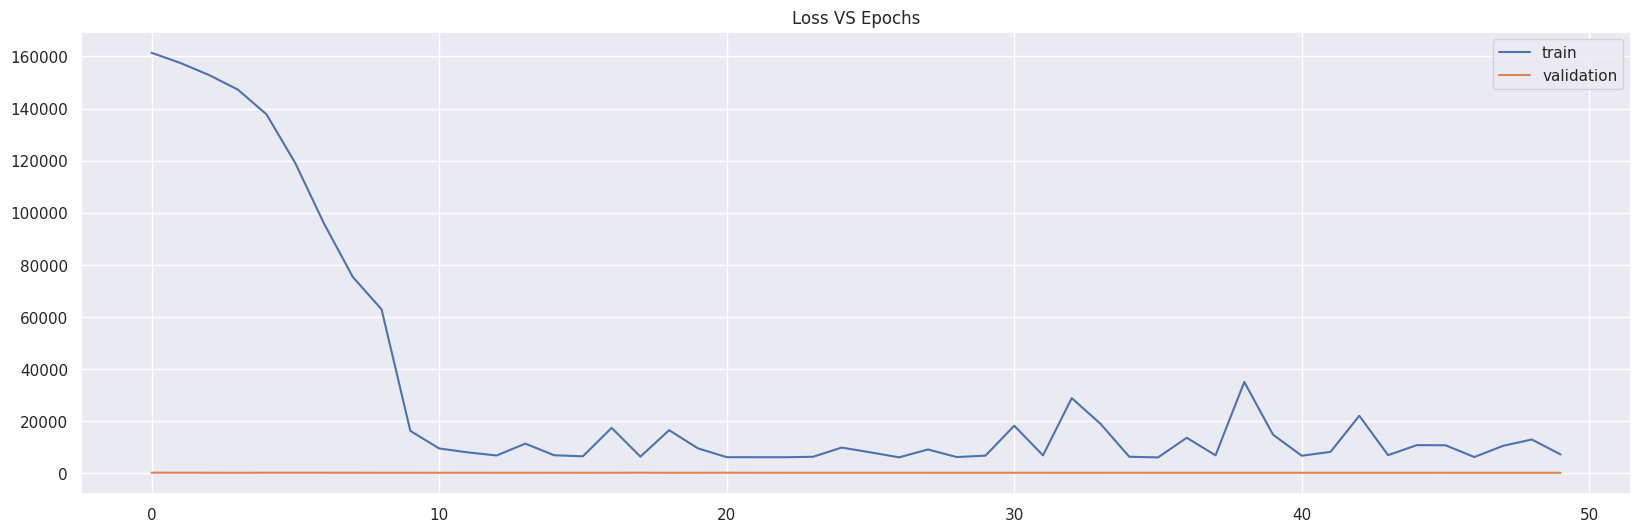

In [92]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

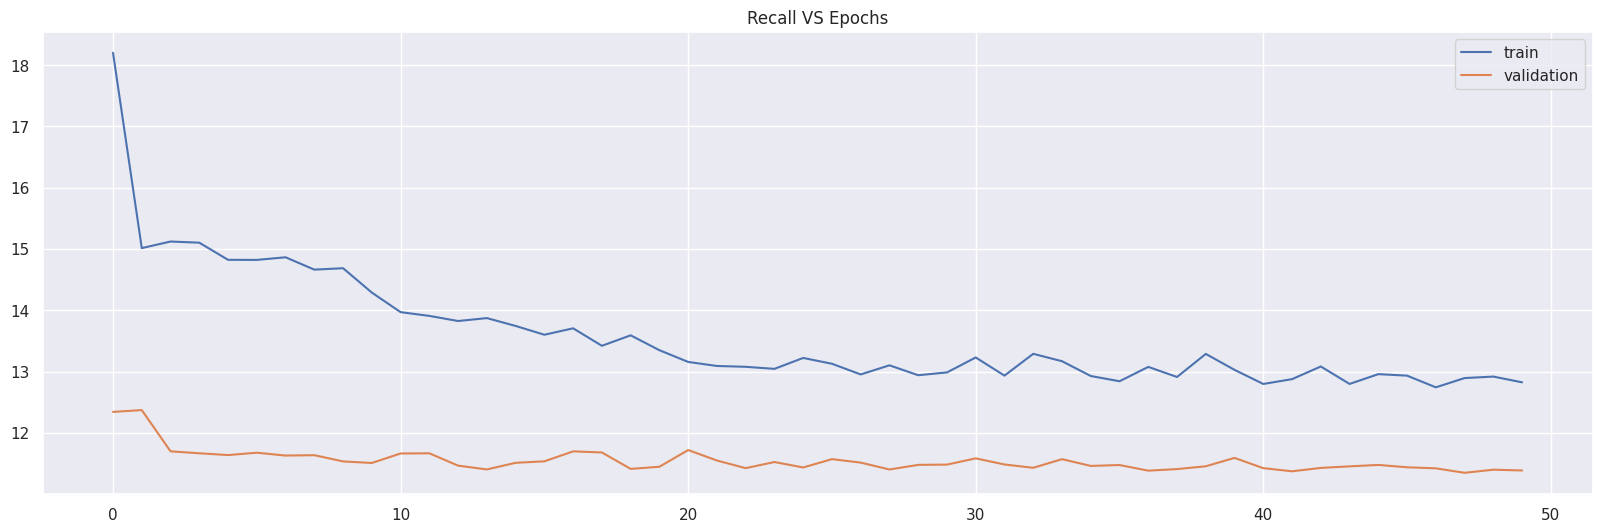

In [93]:
epochs = history.epoch
recall = history.history["mae"]
val_recall = history.history["val_mae"]


plt.plot(epochs, recall, label="train")
plt.plot(epochs, val_recall, label="validation")

plt.legend()
plt.title("Recall VS Epochs")

plt.show()
  


In [94]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_test, y_test)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

498/498 [==============================] - 1s 2ms/step - loss: 263.2067 - mae: 11.3989 - precision: 1.0000 - recall: 1.0000 - accuracy: 0.0000e+00
Evaluation
LOSS: 263.20672607421875
MAE: 11.398862838745117


In [99]:
# Train Predictions
y_pred_val_rna = model_dense.predict(X_val)

# Test Predictions
y_pred_test_rna = model_dense.predict(X_test)

498/498 [==============================] - 1s 3ms/step


In [101]:

# Train Metrics
metrics_evals(y_val, y_pred_val_rna)

{'MSE': 2904.4193788199686,
 'RMSE': 53.89266535271724,
 'MAE': 11.8315370750445,
 'R2': 0.03105866166032567}

In [97]:

# Test Metrics
metrics_evals(y_test, y_pred_test_rna)
     

{'MSE': 263.2066849606504,
 'RMSE': 16.223645859074047,
 'MAE': 11.398862316329213,
 'R2': 0.19784192616633056}

#Observation
* The peak hours for receiving more orders are between 1-6 AM and 3-11 PM.
* Created at only for January and February of the year 2015.
* Has we can see Order_protocol for 6.0 and 7.0 is very minimal or not available.
* the most used Order_protocol are 1.0, 3.0 and 5.0.where as other two 2.0 and 4.0 are minimal.
* Market_id 1.0, 2.0 and 4.0 are more in all the order_protocol
* American, mexcian, Pizza, burger and sandwitch are highly ordered category irrespective to market_id
* Tuesday and wednesday are the most ordered Weekdays.
* 80% of the created and delivery hours are same.
* total_onshift_order,total_busy_partners, total_outstanding_orders are highly correlated with each other.

##Classical ML methods
* Random Forest.
Scaling in neural networks
Scaling is an important preprocessing step for neural networks because it helps to ensure that all input features are treated equally by the network during training.

##Optimizer.
Adam utilizes adaptive learning rates for individual weights in the neural network, enabling automatic adjustment of the learning rate based on the historical gradients of each weight. This dynamic adjustment helps prevent the network from becoming trapped in local minima and enhances the algorithm's convergence speed.
##Activation functions
#ReLU:
ReLU is a non-linear activation function, which means that it can model non-linear relationships between the input features and the output variable. 

##Prediction
our Predicted delivery time are almost close to actual values with good accuracy.
